# Final project

Student name : Maria Bracque Vendrell and Théo Condette

Dataset name: AMES, House Prices dataset

Documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

Related publication article: http://jse.amstat.org/v19n3/decock.pdf

Related Kaggle challenge: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Objective and what you are expected to do

The dataset is considered as a standard for regression, see for instance the related Kaggle challenge. The generic task is to predict the house Price based on the features of the house.

Aside from classic exploratory data analysis and a classic linear model for prediction, their are many approaches that can be tried out on this dataset: (not ranked)
- Identifying most pertinent variables for target prediction
- Cleaning issues and Missing data: removing observations, columns, imputing cells
- Prediction algorithms
- Hyperparameter optimization
- Explaining predictions obtained
- Clustering houses
- Dimension reduction of the features matrix

About the scientific part, you should pay a specific attention to:

- Resampling issues
- Statistical modelling issues (2 points for the explanations, use Latex!)
- Optimization issues (2 points for the description of the mathematical resolution, use Latex!)


You shall divide in groups of 2 persons maximum, and explore the leads which you deem most interesting.

You are asked to produce a report with a notebook + a pdf file for the mathematical and statistical descriptions.

It is mandatory to explain each algorithm you use to deal with the datascience problem.

*You have to upload your files before friday, 29 of december, 18h00.*

Good luck !

# Imports Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikeras[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully un

In [ ]:
# basic functions
import numpy as np
# handling dataframes
import pandas as pd
#math
from math import ceil
#plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn as sk
#for missing values
from sklearn.impute import SimpleImputer
#for outliers
from scipy.stats import mstats
# Dimension reduction :
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#Clustering
from sklearn.cluster import KMeans
#for splitting dataset
from sklearn.model_selection import train_test_split
#Linear Regression
from sklearn.linear_model import LinearRegression
#Lasso Regression
from sklearn.linear_model import Lasso
#Random Forest
from sklearn.ensemble import RandomForestRegressor
#XGBoost
from xgboost import XGBRegressor
#Neural Networks
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import scikeras
import numpy as np
from sklearn.datasets import make_classification
from tensorflow import keras
from scikeras.wrappers import KerasRegressor
from sklearn.neural_network import MLPRegressor
#Metrics
from sklearn.metrics import mean_squared_error, r2_score
#GridSearch
from sklearn.model_selection import GridSearchCV


# Data Import

In [ ]:
# data is freely available at the following url:
# you might want to download the file so as to not be wifi dependent!
data_path = "http://jse.amstat.org/v19n3/decock/AmesHousing.txt"

In [ ]:
# read data
my_data = pd.read_table(data_path)

In [ ]:
# change display output
pd.set_option('display.max_columns', 100)
# first five rows, quick check
my_data.head(n = 5)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1Story             6             5   
1       Feedr        Norm      1Fam      1Story             5             6   
2        Norm        Norm      1Fam      1Story             6             6   
3        Norm        Norm      1Fam      1Story             7             5   
4        Norm        Norm      1Fam      2Story             5             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1960            1960        Hip   CompShg      BrkFace      Plywood   
1        1961            1961      Gable   CompShg      VinylSd      VinylSd   
2        1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3        1968            1968        Hip   CompShg      BrkFace      BrkFace   
4        1997            1998      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0        Stone         112.0         TA         TA     CBlock        TA   
1         None           0.0         TA         TA     CBlock        TA   
2      BrkFace         108.0         TA         TA     CBlock        TA   
3         None           0.0         Gd         TA     CBlock        TA   
4         None           0.0         TA         TA      PConc        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        Gd            Gd            BLQ         639.0            Unf   
1        TA            No            Rec         468.0            LwQ   
2        TA            No            ALQ         923.0            Unf   
3        TA            No            ALQ        1065.0            Unf   
4        TA            No            GLQ         791.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        441.0         1080.0    GasA         Fa           Y   
1         144.0        270.0          882.0    GasA         TA           Y   
2           0.0        406.0         1329.0    GasA         TA           Y   
3           0.0       1045.0         2110.0    GasA         Ex           Y   
4           0.0        137.0          928.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr        1656           0                0         1656   
1      SBrkr         896           0                0          896   
2      SBrkr        1329           0                0         1329   
3      SBrkr        2110           0                0         2110   
4      SBrkr         928         701                0         1629   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             1.0             0.0          1          0              3   
1             0.0             0.0          1          0              2   
2             0.0             0.0          1          1              3   
3             1.0             0.0

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
my_data.shape

(2930, 82)

There are 2930 observations and 82 variables.

# Pre-processing data

The goal of this part is to prepare data for our analysis :

1.   Variables to keep.
2. Management of outliers.
3. Management of NaN: imputation or delete observation.

Before doing the descriptive analysis, let's look if there are any missing values and any duplicates.

First, let us check the variables with missing values and the number of missing values for each variable.

In [ ]:
my_data.isnull().sum()[my_data.isnull().sum() > 0]

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

For the variables with only one or two missing values, we can delete the observations.

In [ ]:
my_data.dropna(subset=['BsmtFin SF 1'], inplace=True)
my_data.dropna(subset=['BsmtFin SF 2'], inplace=True)
my_data.dropna(subset=['Bsmt Unf SF'], inplace=True)
my_data.dropna(subset=['Total Bsmt SF'], inplace=True)
my_data.dropna(subset=['Electrical'], inplace=True)
my_data.dropna(subset=['Bsmt Full Bath'], inplace=True)
my_data.dropna(subset=['Bsmt Half Bath'], inplace=True)
my_data.dropna(subset=['Garage Cars'], inplace=True)
my_data.dropna(subset=['Garage Area'], inplace=True)

my_data.shape

(2926, 82)

We only deleted four observations.

Let us have a look at the updated variables with missing values.

In [ ]:
my_data.isnull().sum()[my_data.isnull().sum() > 0]

Lot Frontage       490
Alley             2728
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           78
Bsmt Cond           78
Bsmt Exposure       81
BsmtFin Type 1      78
BsmtFin Type 2      79
Fireplace Qu      1419
Garage Type        157
Garage Yr Blt      158
Garage Finish      158
Garage Qual        158
Garage Cond        158
Pool QC           2913
Fence             2356
Misc Feature      2820
dtype: int64

We are going to delete the columns whose number of missing values exceed 75%.

In [ ]:
tresh = len(my_data) - 0.75*len(my_data)
my_data.dropna(thresh=tresh, axis=1, inplace=True)

In [ ]:
my_data.isnull().sum()[my_data.isnull().sum() > 0]

Lot Frontage       490
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           78
Bsmt Cond           78
Bsmt Exposure       81
BsmtFin Type 1      78
BsmtFin Type 2      79
Fireplace Qu      1419
Garage Type        157
Garage Yr Blt      158
Garage Finish      158
Garage Qual        158
Garage Cond        158
dtype: int64

In [ ]:
my_data.shape

(2926, 78)

Now, we have to impute the rest of the missing values to make the data suitable for the analysis.

In [ ]:
my_data[my_data.columns[my_data.isna().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2436 non-null   float64
 1   Mas Vnr Type    2903 non-null   object 
 2   Mas Vnr Area    2903 non-null   float64
 3   Bsmt Qual       2848 non-null   object 
 4   Bsmt Cond       2848 non-null   object 
 5   Bsmt Exposure   2845 non-null   object 
 6   BsmtFin Type 1  2848 non-null   object 
 7   BsmtFin Type 2  2847 non-null   object 
 8   Fireplace Qu    1507 non-null   object 
 9   Garage Type     2769 non-null   object 
 10  Garage Yr Blt   2768 non-null   float64
 11  Garage Finish   2768 non-null   object 
 12  Garage Qual     2768 non-null   object 
 13  Garage Cond     2768 non-null   object 
dtypes: float64(3), object(11)
memory usage: 342.9+ KB


For the categorical variables, we will:
1. For the variables where the mode contains more than 60% of the oberservations, we replace the missing value by the mode.

In [ ]:
missing_cat = my_data[my_data.columns[my_data.isna().any()]].select_dtypes(include=['object'])

In [ ]:
for col in missing_cat.columns:
    if missing_cat[col].value_counts(normalize=True).iloc[0] > 0.70:
      missing_cat[col] = SimpleImputer(strategy='most_frequent').fit_transform(missing_cat[[col]])
      my_data[col]=missing_cat[col]

In [ ]:
#we update it since some variables don't have missing values anymore
missing_cat = my_data[my_data.columns[my_data.isna().any()]].select_dtypes(include=['object'])

In [ ]:
my_data.select_dtypes(include=['object']).isnull().sum()[my_data.isnull().sum() > 0]

Mas Vnr Type        23
Bsmt Qual           78
Bsmt Exposure       81
BsmtFin Type 1      78
Fireplace Qu      1419
Garage Type        157
Garage Finish      158
dtype: int64


2.  For the rest, we look at the variables one by one




We start with 'Fireplace Qu'.

In [ ]:
my_data.loc[my_data['Fireplace Qu'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
6         7  527127150          120        RL          41.0      4920   Pave   
7         8  527145080          120        RL          43.0      5005   Pave   
11       12  527165230           20        RL           NaN      7980   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2921   2922  923229110           90        RL          55.0     12640   Pave   
2922   2923  923230040           90        RL          63.0      9297   Pave   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1          Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2          IR1          Lvl    AllPub     Corner        Gtl        NAmes   
6          Reg          Lvl    AllPub     Inside        Gtl      StoneBr   
7          IR1          HLS    AllPub     Inside        Gtl      StoneBr   
11         IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
...        ...          ...       ...        ...        ...          ...   
2921       IR1          Lvl    AllPub     Inside        Gtl      Mitchel   
2922       Reg          Lvl    AllPub     Inside        Gtl      Mitchel   
2925       IR1          Lvl    AllPub    CulDSac        Gtl      Mitchel   
2926       IR1          Low    AllPub     Inside        Mod      Mitchel   
2927       Reg          Lvl    AllPub     Inside        Gtl      Mitchel   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1          Feedr        Norm      1Fam      1Story             5   
2           Norm        Norm      1Fam      1Story             6   
6           Norm        Norm    TwnhsE      1Story             8   
7           Norm        Norm    TwnhsE      1Story             8   
11          Norm        Norm      1Fam      1Story             6   
...          ...         ...       ...         ...           ...   
2921        Norm        Norm    Duplex      1Story             6   
2922        Norm        Norm    Duplex      1Story             5   
2925        Norm        Norm      1Fam        SLvl             6   
2926        Norm        Norm      1Fam      1Story             5   
2927        Norm        Norm      1Fam      SFoyer             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1                6        1961            1961      Gable   CompShg   
2                6        1958            1958        Hip   CompShg   
6                5        2001            2001      Gable   CompShg   
7                5        1992            1992      Gable   CompShg   
11               7        1992            2007      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2921             5        1976            1976      Gable   CompShg   
2922             5        1976            1976      Gable   CompShg   
2925             6        1984            1984      Gable   CompShg   
2926             5        1983            1983      Gable   CompShg   
2927             5        1992            1992      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1         VinylSd      VinylSd         None           0.0         TA   
2         Wd Sdng      Wd Sdng      BrkFace         108.0         TA   
6         CemntBd      CmentBd         None           0.0         Gd   
7         HdBoard      HdBoard         None           0.0         Gd   
11        HdBoard      HdBoard         None           0.0         TA   
...           ...          ...

In [ ]:
s=0
for index, row in my_data.iterrows():
    if row['Fireplaces'] == 0:
        if pd.isnull(row['Fireplace Qu']):
          s+=1
print(s)

1419


We notice that all missing values for 'Fireplace Q' are houses without a fireplace. Looking at the description of the variables, we see that there is a categorie NA for houses without a fireplace. We will tus change the missing values by 'NA'.


In [ ]:
for index, row in my_data.iterrows():
    if row['Fireplaces'] == 0:
        if pd.isnull(row['Fireplace Qu']):
            my_data.at[index, 'Fireplace Qu'] = 'NA'

Let us check what categorical variables with missing values are left:

In [ ]:
my_data.select_dtypes(include=['object']).isnull().sum()[my_data.isnull().sum() > 0]

Mas Vnr Type       23
Bsmt Qual          78
Bsmt Exposure      81
BsmtFin Type 1     78
Garage Type       157
Garage Finish     158
dtype: int64

Let us now deal with 'Mas Vnr Type' that is the Masonry veneer type:

In [ ]:
my_data.loc[my_data['Mas Vnr Type'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
55       56  528240070           60        RL           NaN      7851   Pave   
484     485  528275160           60        RL           NaN     12891   Pave   
517     518  528458020           20        FV          90.0      7993   Pave   
538     539  531371050           20        RL          67.0     10083   Pave   
867     868  907260030           60        RL          70.0      8749   Pave   
1095   1096  528290090           60        RL           NaN      7750   Pave   
1119   1120  528439010           20        RL          87.0     10037   Pave   
1122   1123  528462040           20        FV          95.0     11639   Pave   
1127   1128  528480160           60        FV          65.0      8125   Pave   
1184   1185  534104100           60        FV           NaN      7500   Pave   
1454   1455  907251090           60        RL          75.0      9473   Pave   
1727   1728  528218010           60        RL          59.0     15810   Pave   
1751   1752  528250010           80        RL           NaN     11950   Pave   
1783   1784  528435010           20        RL          85.0      9965   Pave   
1799   1800  528458150           60        FV         112.0     12217   Pave   
1839   1840  533208030          120        FV          30.0      5330   Pave   
1840   1841  533208040          120        FV          35.0      4274   Pave   
2229   2230  909475070           20        RL           NaN     32668   Pave   
2260   2261  916384070           20        RL          68.0      8298   Pave   
2382   2383  528110050           20        RL         107.0     13891   Pave   
2392   2393  528142010           60        RL         103.0     12867   Pave   
2455   2456  528429100           20        RL          49.0     15218   Pave   
2823   2824  908130020           20        RL          75.0      8050   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
55         Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
484        IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
517        IR1          Lvl    AllPub     Inside        Gtl      Somerst   
538        Reg          Lvl    AllPub     Inside        Gtl      SawyerW   
867        Reg          Lvl    AllPub     Inside        Gtl      CollgCr   
1095       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
1119       Reg          Lvl    AllPub     Corner        Gtl      Somerst   
1122       Reg          Lvl    AllPub     Corner        Gtl      Somerst   
1127       Reg          Lvl    AllPub     Inside        Gtl      Somerst   
1184       Reg          Lvl    AllPub     Inside        Gtl      Somerst   
1454       Reg          Lvl    AllPub     Inside        Gtl      CollgCr   
1727       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1751       IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
1783       Reg          Lvl    AllPub        FR2        Gtl      Somerst   
1799       IR1          Lvl    AllPub     Inside        Gtl      Somerst   
1839       IR2          Lvl    AllPub     Inside        Gtl      Somerst   
1840       IR1          Lvl    AllPub     Inside        Gtl      Somerst   
2229       IR1          Lvl    AllPub    CulDSac        Gtl      Crawfor   
2260       IR1          HLS    AllPub     Inside        Gtl       Timber   
2382       Reg          Lvl    AllPub     Inside        Gtl      NridgHt   
2392       IR1          Lvl    AllPub     Corner        Gtl      NridgHt   
2455       IR1          Lvl    AllPub    CulDSac        Gtl      Somerst   
2823       Reg          Lvl    AllPub     Inside        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
55          Norm        Norm      1Fam      2Story             6   
484         Norm        Norm      1Fam      2Story             8   
517         Norm        Norm      1Fam      1Story      

In this case, by looking at the documentation, we could change the missing values by 'None'.

In [ ]:
my_data['Mas Vnr Type']=my_data['Mas Vnr Type'].fillna('None')

Let us check what categorical variables with missing values are left:

In [ ]:
my_data.select_dtypes(include=['object']).isnull().sum()[my_data.isnull().sum() > 0]

Bsmt Qual          78
Bsmt Exposure      81
BsmtFin Type 1     78
Garage Type       157
Garage Finish     158
dtype: int64

Let us deal now with 'Bsmt Qual':

In [ ]:
my_data.loc[my_data['Bsmt Qual'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
83       84  532351140           90        RM          68.0      8930   Pave   
154     155  535327140           20        RL          60.0      7200   Pave   
206     207  903454060          190        RM          70.0      5600   Pave   
243     244  905478190           20        RL          60.0     11100   Pave   
273     274  908102060           30        RL          67.0      8777   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2739   2740  905451050           20        RL          80.0     12048   Pave   
2744   2745  905477010           20        RL          77.0      8335   Pave   
2879   2880  911175410           30   C (all)          69.0     12366   Pave   
2892   2893  916252170          120        RM           NaN      8239   Pave   
2903   2904  923125030           20   A (agr)         125.0     31250   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
83         Reg          Lvl    AllPub     Inside        Gtl       Sawyer   
154        Reg          Lvl    AllPub     Inside        Gtl        NAmes   
206        Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   
243        Reg          Low    AllPub     Inside        Gtl      Edwards   
273        Reg          Lvl    AllPub     Inside        Mod      Edwards   
...        ...          ...       ...        ...        ...          ...   
2739       Reg          Lvl    AllPub     Inside        Gtl      Edwards   
2744       Reg          Lvl    AllPub     Corner        Gtl      Edwards   
2879       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   
2892       IR1          Lvl    AllPub     Inside        Gtl      GrnHill   
2903       Reg          Lvl    AllPub     Inside        Gtl      Mitchel   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
83          RRAe        Norm    Duplex      1.5Fin             6   
154         Norm        Norm      1Fam      1Story             5   
206         Norm        Norm    2fmCon      2Story             4   
243         Norm        Norm      1Fam      1Story             4   
273        Feedr        Norm      1Fam      1Story             3   
...          ...         ...       ...         ...           ...   
2739        Norm        Norm      1Fam      1Story             5   
2744        Norm        Norm      1Fam      1Story             5   
2879       Feedr        Norm      1Fam      1Story             3   
2892        Norm        Norm    TwnhsE      1Story             7   
2903      Artery        Norm      1Fam      1Story             1   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
83               5        1978            1978      Gable   CompShg   
154              7        1955            2007      Gable   CompShg   
206              5        1930            1950        Hip   CompShg   
243              7        1946            2006      Gable   CompShg   
273              6        1945            2007      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2739             6        1952            2002      Gable   CompShg   
2744             5        1954            1954      Gable   CompShg   
2879             5        1945            1950      Gable   CompShg   
2892             5        1986            1986      Gable   CompShg   
2903             3        1951            1951      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
83        VinylSd      VinylSd         None           0.0         TA   
154       VinylSd      VinylSd         None           0.0         TA   
206       VinylSd      Wd Shng         None           0.0         Fa   
243       MetalSd      MetalSd         None           0.0         TA   
273       VinylSd      VinylSd         None           0.0         TA   
...           ...          ...

In [ ]:
s=0
for index, row in my_data.iterrows():
    if row['Bsmt Cond'] == 'TA':
        if pd.isnull(row['Bsmt Qual']):
          s+=1
print(s)

78


We see that all missing values correspond to typical - slight dampness allowed when looking at the 'Bsmt Qual' variable. So, we cannot replace them by 'None' since there are basements in those houses.

Let us try to see by which value we can replace them:

In [ ]:
my_data[my_data['Bsmt Cond'] == 'TA']['Bsmt Qual'].value_counts()

TA    1177
Gd    1141
Ex     234
Fa      61
Po       1
Name: Bsmt Qual, dtype: int64

We see that houses that usually have typical basment quality have either Typical or Good basement conditions. We are going to replace the missing values by 'TA' since it is the more neutral adjective.

In [ ]:
my_data['Bsmt Qual']=my_data['Bsmt Qual'].fillna('TA')

In [ ]:
my_data.select_dtypes(include=['object']).isnull().sum()[my_data.isnull().sum() > 0]

Bsmt Exposure      81
BsmtFin Type 1     78
Garage Type       157
Garage Finish     158
dtype: int64

Let us deal now with 'Bsmt Exposure':

In [ ]:
my_data.loc[my_data['Bsmt Exposure'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
66       67  528445060           20        RL          73.0      8987   Pave   
83       84  532351140           90        RM          68.0      8930   Pave   
154     155  535327140           20        RL          60.0      7200   Pave   
206     207  903454060          190        RM          70.0      5600   Pave   
243     244  905478190           20        RL          60.0     11100   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2744   2745  905477010           20        RL          77.0      8335   Pave   
2779   2780  907194130           60        RL          65.0     14006   Pave   
2879   2880  911175410           30   C (all)          69.0     12366   Pave   
2892   2893  916252170          120        RM           NaN      8239   Pave   
2903   2904  923125030           20   A (agr)         125.0     31250   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
66         Reg          Lvl    AllPub     Inside        Gtl      Somerst   
83         Reg          Lvl    AllPub     Inside        Gtl       Sawyer   
154        Reg          Lvl    AllPub     Inside        Gtl        NAmes   
206        Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   
243        Reg          Low    AllPub     Inside        Gtl      Edwards   
...        ...          ...       ...        ...        ...          ...   
2744       Reg          Lvl    AllPub     Corner        Gtl      Edwards   
2779       IR1          Lvl    AllPub     Inside        Gtl      CollgCr   
2879       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   
2892       IR1          Lvl    AllPub     Inside        Gtl      GrnHill   
2903       Reg          Lvl    AllPub     Inside        Gtl      Mitchel   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
66          Norm        Norm      1Fam      1Story             8   
83          RRAe        Norm    Duplex      1.5Fin             6   
154         Norm        Norm      1Fam      1Story             5   
206         Norm        Norm    2fmCon      2Story             4   
243         Norm        Norm      1Fam      1Story             4   
...          ...         ...       ...         ...           ...   
2744        Norm        Norm      1Fam      1Story             5   
2779        Norm        Norm      1Fam      2Story             7   
2879       Feedr        Norm      1Fam      1Story             3   
2892        Norm        Norm    TwnhsE      1Story             7   
2903      Artery        Norm      1Fam      1Story             1   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
66               5        2005            2006      Gable   CompShg   
83               5        1978            1978      Gable   CompShg   
154              7        1955            2007      Gable   CompShg   
206              5        1930            1950        Hip   CompShg   
243              7        1946            2006      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2744             5        1954            1954      Gable   CompShg   
2779             5        2002            2002      Gable   CompShg   
2879             5        1945            1950      Gable   CompShg   
2892             5        1986            1986      Gable   CompShg   
2903             3        1951            1951      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
66        VinylSd      VinylSd      BrkFace         226.0         Gd   
83        VinylSd      VinylSd         None           0.0         TA   
154       VinylSd      VinylSd         None           0.0         TA   
206       VinylSd      Wd Shng         None           0.0         Fa   
243       MetalSd      MetalSd         None           0.0         TA   
...           ...          ...

In [ ]:
s=0
for index, row in my_data.iterrows():
    if row['Bsmt Cond'] == 'TA':
        if pd.isnull(row['Bsmt Exposure']):
          s+=1
print(s)

81


Same as before, we see that all missing values correspond to 'typical - slight dampness allowed' when looking at the 'Bsmt Qual' variable. So, we cannot replace them by 'None' since there are basements in those houses.

Let us try to see by which value we can replace them:

In [ ]:
my_data[my_data['Bsmt Cond'] == 'TA']['Bsmt Exposure'].value_counts()

No    1743
Av     393
Gd     259
Mn     216
Name: Bsmt Exposure, dtype: int64

We see that houses that usually have typical basment quality have no basement expore. Thus, we are going to replace the missing values by 'No'.

In [ ]:
my_data['Bsmt Exposure']=my_data['Bsmt Exposure'].fillna('No')

In [ ]:
my_data.select_dtypes(include=['object']).isnull().sum()[my_data.isnull().sum() > 0]

BsmtFin Type 1     78
Garage Type       157
Garage Finish     158
dtype: int64

Let us deal now with 'BsmtFin Type 1':

In [ ]:
my_data.loc[my_data['BsmtFin Type 1'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
83       84  532351140           90        RM          68.0      8930   Pave   
154     155  535327140           20        RL          60.0      7200   Pave   
206     207  903454060          190        RM          70.0      5600   Pave   
243     244  905478190           20        RL          60.0     11100   Pave   
273     274  908102060           30        RL          67.0      8777   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2739   2740  905451050           20        RL          80.0     12048   Pave   
2744   2745  905477010           20        RL          77.0      8335   Pave   
2879   2880  911175410           30   C (all)          69.0     12366   Pave   
2892   2893  916252170          120        RM           NaN      8239   Pave   
2903   2904  923125030           20   A (agr)         125.0     31250   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
83         Reg          Lvl    AllPub     Inside        Gtl       Sawyer   
154        Reg          Lvl    AllPub     Inside        Gtl        NAmes   
206        Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   
243        Reg          Low    AllPub     Inside        Gtl      Edwards   
273        Reg          Lvl    AllPub     Inside        Mod      Edwards   
...        ...          ...       ...        ...        ...          ...   
2739       Reg          Lvl    AllPub     Inside        Gtl      Edwards   
2744       Reg          Lvl    AllPub     Corner        Gtl      Edwards   
2879       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   
2892       IR1          Lvl    AllPub     Inside        Gtl      GrnHill   
2903       Reg          Lvl    AllPub     Inside        Gtl      Mitchel   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
83          RRAe        Norm    Duplex      1.5Fin             6   
154         Norm        Norm      1Fam      1Story             5   
206         Norm        Norm    2fmCon      2Story             4   
243         Norm        Norm      1Fam      1Story             4   
273        Feedr        Norm      1Fam      1Story             3   
...          ...         ...       ...         ...           ...   
2739        Norm        Norm      1Fam      1Story             5   
2744        Norm        Norm      1Fam      1Story             5   
2879       Feedr        Norm      1Fam      1Story             3   
2892        Norm        Norm    TwnhsE      1Story             7   
2903      Artery        Norm      1Fam      1Story             1   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
83               5        1978            1978      Gable   CompShg   
154              7        1955            2007      Gable   CompShg   
206              5        1930            1950        Hip   CompShg   
243              7        1946            2006      Gable   CompShg   
273              6        1945            2007      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2739             6        1952            2002      Gable   CompShg   
2744             5        1954            1954      Gable   CompShg   
2879             5        1945            1950      Gable   CompShg   
2892             5        1986            1986      Gable   CompShg   
2903             3        1951            1951      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
83        VinylSd      VinylSd         None           0.0         TA   
154       VinylSd      VinylSd         None           0.0         TA   
206       VinylSd      Wd Shng         None           0.0         Fa   
243       MetalSd      MetalSd         None           0.0         TA   
273       VinylSd      VinylSd         None           0.0         TA   
...           ...          ...

In [ ]:
s=0
for index, row in my_data.iterrows():
    if row['BsmtFin SF 1'] == 0.0:
        if pd.isnull(row['BsmtFin Type 1']):
          s+=1
print(s)

78


We can see that all houses missing values for the rating of basement finished area ('BsmtFin Type 1') have also 0 finished square feet ('BsmtFin SF 1').

Let us try to see by which value we can replace them:

In [ ]:
my_data[my_data['BsmtFin SF 1'] == 0.0]['BsmtFin Type 1'].value_counts()

Unf    850
Name: BsmtFin Type 1, dtype: int64

All houses that have 0 finished square feet have an unifished basement area. We can thus replace the missing values by 'Unf'.

In [ ]:
my_data['BsmtFin Type 1']=my_data['BsmtFin Type 1'].fillna('Unf')

In [ ]:
my_data.select_dtypes(include=['object']).isnull().sum()[my_data.isnull().sum() > 0]

Garage Type      157
Garage Finish    158
dtype: int64

Let us deal with 'Garage Type':

In [ ]:
my_data.loc[my_data['Garage Type'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
27       28  527425090           20        RL          70.0     10500   Pave   
119     120  534276360           20        RL          77.0      9320   Pave   
125     126  534427010           90        RL          98.0     13260   Pave   
129     130  534450180           20        RL          50.0      7207   Pave   
130     131  534451150           30        RL          55.0      5350   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2913   2914  923226180          180        RM          21.0      1470   Pave   
2916   2917  923228130          180        RM          21.0      1533   Pave   
2918   2919  923228210          160        RM          21.0      1526   Pave   
2919   2920  923228260          160        RM          21.0      1936   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
27         Reg          Lvl    AllPub        FR2        Gtl        NAmes   
119        IR1          Lvl    AllPub     Inside        Gtl        NAmes   
125        IR1          Lvl    AllPub     Inside        Gtl        NAmes   
129        IR1          Lvl    AllPub     Inside        Gtl      BrkSide   
130        IR1          Lvl    AllPub     Inside        Gtl      BrkSide   
...        ...          ...       ...        ...        ...          ...   
2913       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2916       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2918       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2919       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2927       Reg          Lvl    AllPub     Inside        Gtl      Mitchel   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
27          Norm        Norm      1Fam      1Story             4   
119         Norm        Norm      1Fam      1Story             4   
125         Norm        Norm    Duplex      1Story             5   
129         Norm        Norm      1Fam      1Story             5   
130         Norm        Norm      1Fam      1Story             3   
...          ...         ...       ...         ...           ...   
2913        Norm        Norm     Twnhs      SFoyer             4   
2916        Norm        Norm     Twnhs      SFoyer             5   
2918        Norm        Norm     Twnhs      2Story             4   
2919        Norm        Norm     Twnhs      2Story             4   
2927        Norm        Norm      1Fam      SFoyer             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
27               5        1971            1971      Gable   CompShg   
119              5        1959            1959      Gable   CompShg   
125              6        1962            2001        Hip   CompShg   
129              7        1958            2008      Gable   CompShg   
130              2        1940            1966      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2913             6        1970            1970      Gable   CompShg   
2916             7        1970            1970      Gable   CompShg   
2918             5        1970            1970      Gable   CompShg   
2919             7        1970            1970      Gable   CompShg   
2927             5        1992            1992      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
27        HdBoard      HdBoard         None           0.0         TA   
119       Plywood      Plywood         None           0.0         TA   
125       HdBoard      HdBoard      BrkFace         144.0         TA   
129       Wd Sdng      Plywood         None           0.0         TA   
130       Wd Sdng      Plywood         None           0.0         TA   
...           ...          ...

In [ ]:
s=0
for index, row in my_data.iterrows():
    if row['Garage Area'] == 0.0:
        if pd.isnull(row['Garage Type']):
          s+=1
print(s)

157


We can see that all the missing values for the type of garage correspond to houses with a garage area of 0. Thus we can replace the missing values by 'NA' (corresponding to No garage according to the documentation).

In [ ]:
my_data['Garage Type']=my_data['Garage Type'].fillna('NA')

In [ ]:
my_data.select_dtypes(include=['object']).isnull().sum()[my_data.isnull().sum() > 0]

Garage Finish    158
dtype: int64

And finally, let us deal with 'Garage Finish':

In [ ]:
my_data.loc[my_data['Garage Finish'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
27       28  527425090           20        RL          70.0     10500   Pave   
119     120  534276360           20        RL          77.0      9320   Pave   
125     126  534427010           90        RL          98.0     13260   Pave   
129     130  534450180           20        RL          50.0      7207   Pave   
130     131  534451150           30        RL          55.0      5350   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2913   2914  923226180          180        RM          21.0      1470   Pave   
2916   2917  923228130          180        RM          21.0      1533   Pave   
2918   2919  923228210          160        RM          21.0      1526   Pave   
2919   2920  923228260          160        RM          21.0      1936   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
27         Reg          Lvl    AllPub        FR2        Gtl        NAmes   
119        IR1          Lvl    AllPub     Inside        Gtl        NAmes   
125        IR1          Lvl    AllPub     Inside        Gtl        NAmes   
129        IR1          Lvl    AllPub     Inside        Gtl      BrkSide   
130        IR1          Lvl    AllPub     Inside        Gtl      BrkSide   
...        ...          ...       ...        ...        ...          ...   
2913       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2916       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2918       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2919       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2927       Reg          Lvl    AllPub     Inside        Gtl      Mitchel   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
27          Norm        Norm      1Fam      1Story             4   
119         Norm        Norm      1Fam      1Story             4   
125         Norm        Norm    Duplex      1Story             5   
129         Norm        Norm      1Fam      1Story             5   
130         Norm        Norm      1Fam      1Story             3   
...          ...         ...       ...         ...           ...   
2913        Norm        Norm     Twnhs      SFoyer             4   
2916        Norm        Norm     Twnhs      SFoyer             5   
2918        Norm        Norm     Twnhs      2Story             4   
2919        Norm        Norm     Twnhs      2Story             4   
2927        Norm        Norm      1Fam      SFoyer             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
27               5        1971            1971      Gable   CompShg   
119              5        1959            1959      Gable   CompShg   
125              6        1962            2001        Hip   CompShg   
129              7        1958            2008      Gable   CompShg   
130              2        1940            1966      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2913             6        1970            1970      Gable   CompShg   
2916             7        1970            1970      Gable   CompShg   
2918             5        1970            1970      Gable   CompShg   
2919             7        1970            1970      Gable   CompShg   
2927             5        1992            1992      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
27        HdBoard      HdBoard         None           0.0         TA   
119       Plywood      Plywood         None           0.0         TA   
125       HdBoard      HdBoard      BrkFace         144.0         TA   
129       Wd Sdng      Plywood         None           0.0         TA   
130       Wd Sdng      Plywood         None           0.0         TA   
...           ...          ...

In [ ]:
s=0
for index, row in my_data.iterrows():
    if row['Garage Area'] == 0.0:
        if pd.isnull(row['Garage Finish']):
          s+=1
print(s)

157


We can see that 157 of the missing values for the interior finish of the garage correspond to houses with a garage area of 0. Thus we can replace these missing values by 'NA' (corresponding to No garage according to the documentation).

In [ ]:
for index, row in my_data.iterrows():
    if row['Garage Area'] == 0.0:
        if pd.isnull(row['Garage Finish']):
            my_data.at[index, 'Garage Finish'] = 'NA'

Let see what is the 158th missing value:

In [ ]:
my_data.loc[my_data['Garage Finish'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1356   1357  903426160           60        RM          57.0      8094   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1356       Reg          Lvl    AllPub     Inside        Gtl      OldTown   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1356        Norm        Norm    2fmCon      2.5Unf             6   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1356             8        1910            1983      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1356      Wd Sdng      Wd Sdng         None           0.0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1356         TA      PConc        TA        TA            Mn            Rec   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1356         196.0            Unf           0.0       1046.0         1242.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1356    GasA         Gd           Y      SBrkr        1242         742   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1356                0         1984             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1356          0              5              1           TA              8   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1356        Typ           0           NA      Detchd            NaN   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1356           NaN          1.0        360.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1356           Y            64              0             180           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
1356             0          0      1000        9     2008       WD    

     Sale Condition  SalePrice  
1356         Normal     160000

We see that this house has a garage quality ('Garage Qual') and a garage condition ('Garage Cond') typical ('TA'), and a garage location ('Garage Type') detached from home (Detchd). Let us see what value do houses with the same criteria usually have for 'Garage Finish'.

In [ ]:
my_data[(my_data['Garage Qual'] == 'TA') & (my_data['Garage Cond'] == 'TA')]['Garage Finish'].value_counts()

Unf    1057
RFn     795
Fin     715
NA      157
Name: Garage Finish, dtype: int64

We will thus replace this missing value by 'Unf'.

In [ ]:
my_data['Garage Finish']=my_data['Garage Finish'].fillna('Unf')

Now, let us deal with the numerical variables.

In [ ]:
my_data.isnull().sum()[my_data.isnull().sum() > 0]

Lot Frontage     490
Mas Vnr Area      23
Garage Yr Blt    158
dtype: int64

Let us start with 'Lot Frontage'. This variables is the linear feet of street connected to property.

In [ ]:
my_data.loc[my_data['Lot Frontage'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
11       12  527165230           20        RL           NaN      7980   Pave   
14       15  527182190          120        RL           NaN      6820   Pave   
22       23  527368020           60        FV           NaN      7500   Pave   
23       24  527402200           20        RL           NaN     11241   Pave   
24       25  527402250           20        RL           NaN     12537   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2894   2895  916326010           20        RL           NaN     16669   Pave   
2897   2898  916403130           60        RL           NaN     11170   Pave   
2898   2899  916460070           20        RL           NaN      8098   Pave   
2912   2913  923226150           90        RL           NaN     11836   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
11         IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
14         IR1          Lvl    AllPub     Corner        Gtl      StoneBr   
22         Reg          Lvl    AllPub     Inside        Gtl      Somerst   
23         IR1          Lvl    AllPub    CulDSac        Gtl        NAmes   
24         IR1          Lvl    AllPub    CulDSac        Gtl        NAmes   
...        ...          ...       ...        ...        ...          ...   
2894       IR1          Lvl    AllPub     Corner        Gtl       Timber   
2897       IR2          Lvl    AllPub     Corner        Gtl       Timber   
2898       IR1          Lvl    AllPub     Inside        Gtl       Timber   
2912       IR1          Lvl    AllPub     Corner        Gtl      Mitchel   
2926       IR1          Low    AllPub     Inside        Mod      Mitchel   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
11          Norm        Norm      1Fam      1Story             6   
14          Norm        Norm    TwnhsE      1Story             8   
22          Norm        Norm      1Fam      2Story             7   
23          Norm        Norm      1Fam      1Story             6   
24          Norm        Norm      1Fam      1Story             5   
...          ...         ...       ...         ...           ...   
2894        Norm        Norm      1Fam      1Story             8   
2897        Norm        Norm      1Fam      2Story             7   
2898        Norm        Norm      1Fam      1Story             6   
2912        Norm        Norm    Duplex      1Story             5   
2926        Norm        Norm      1Fam      1Story             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
11               7        1992            2007      Gable   CompShg   
14               5        1985            1985      Gable   CompShg   
22               5        2000            2000      Gable   CompShg   
23               7        1970            1970      Gable   CompShg   
24               6        1971            2008      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2894             6        1981            1981        Hip   WdShake   
2897             5        1990            1991      Gable   CompShg   
2898             5        2000            2000      Gable   CompShg   
2912             5        1970            1970      Gable   CompShg   
2926             5        1983            1983      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
11        HdBoard      HdBoard         None           0.0         TA   
14        HdBoard      HdBoard         None           0.0         Gd   
22        VinylSd      VinylSd         None           0.0         Gd   
23        Wd Sdng      Wd Sdng      BrkFace         180.0         TA   
24        VinylSd      VinylSd         None           0.0         TA   
...           ...          ...

We will replace the missing values by the mean conditional to the lot configuration.

In [ ]:
for index, row in my_data.iterrows():
  if row['Lot Config'] == 'Inside':
    if pd.isnull(row['Lot Frontage']):
      my_data.at[index, 'Lot Frontage'] = my_data[my_data['Lot Config'] == 'Inside']['Lot Frontage'].mean()
  if row['Lot Config'] == 'Corner':
    if pd.isnull(row['Lot Frontage']):
      my_data.at[index, 'Lot Frontage'] = my_data[my_data['Lot Config'] == 'Corner']['Lot Frontage'].mean()
  if row['Lot Config'] == 'CulDSac':
    if pd.isnull(row['Lot Frontage']):
      my_data.at[index, 'Lot Frontage'] = my_data[my_data['Lot Config'] == 'CulDSac']['Lot Frontage'].mean()
  if row['Lot Config'] == 'FR2':
    if pd.isnull(row['Lot Frontage']):
      my_data.at[index, 'Lot Frontage'] = my_data[my_data['Lot Config'] == 'FR2']['Lot Frontage'].mean()
  if row['Lot Config'] == 'FR3':
    if pd.isnull(row['Lot Frontage']):
      my_data.at[index, 'Lot Frontage'] = my_data[my_data['Lot Config'] == 'FR3']['Lot Frontage'].mean()

In [ ]:
my_data.isnull().sum()[my_data.isnull().sum() > 0]

Mas Vnr Area      23
Garage Yr Blt    158
dtype: int64

Now, let us deal with 'Mas Vnr Area'.

In [ ]:
my_data.loc[my_data['Mas Vnr Area'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
55       56  528240070           60        RL     67.123457      7851   Pave   
484     485  528275160           60        RL     82.690418     12891   Pave   
517     518  528458020           20        FV     90.000000      7993   Pave   
538     539  531371050           20        RL     67.000000     10083   Pave   
867     868  907260030           60        RL     70.000000      8749   Pave   
1095   1096  528290090           60        RL     67.123457      7750   Pave   
1119   1120  528439010           20        RL     87.000000     10037   Pave   
1122   1123  528462040           20        FV     95.000000     11639   Pave   
1127   1128  528480160           60        FV     65.000000      8125   Pave   
1184   1185  534104100           60        FV     67.123457      7500   Pave   
1454   1455  907251090           60        RL     75.000000      9473   Pave   
1727   1728  528218010           60        RL     59.000000     15810   Pave   
1751   1752  528250010           80        RL     82.690418     11950   Pave   
1783   1784  528435010           20        RL     85.000000      9965   Pave   
1799   1800  528458150           60        FV    112.000000     12217   Pave   
1839   1840  533208030          120        FV     30.000000      5330   Pave   
1840   1841  533208040          120        FV     35.000000      4274   Pave   
2229   2230  909475070           20        RL     56.304348     32668   Pave   
2260   2261  916384070           20        RL     68.000000      8298   Pave   
2382   2383  528110050           20        RL    107.000000     13891   Pave   
2392   2393  528142010           60        RL    103.000000     12867   Pave   
2455   2456  528429100           20        RL     49.000000     15218   Pave   
2823   2824  908130020           20        RL     75.000000      8050   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
55         Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
484        IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
517        IR1          Lvl    AllPub     Inside        Gtl      Somerst   
538        Reg          Lvl    AllPub     Inside        Gtl      SawyerW   
867        Reg          Lvl    AllPub     Inside        Gtl      CollgCr   
1095       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
1119       Reg          Lvl    AllPub     Corner        Gtl      Somerst   
1122       Reg          Lvl    AllPub     Corner        Gtl      Somerst   
1127       Reg          Lvl    AllPub     Inside        Gtl      Somerst   
1184       Reg          Lvl    AllPub     Inside        Gtl      Somerst   
1454       Reg          Lvl    AllPub     Inside        Gtl      CollgCr   
1727       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1751       IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
1783       Reg          Lvl    AllPub        FR2        Gtl      Somerst   
1799       IR1          Lvl    AllPub     Inside        Gtl      Somerst   
1839       IR2          Lvl    AllPub     Inside        Gtl      Somerst   
1840       IR1          Lvl    AllPub     Inside        Gtl      Somerst   
2229       IR1          Lvl    AllPub    CulDSac        Gtl      Crawfor   
2260       IR1          HLS    AllPub     Inside        Gtl       Timber   
2382       Reg          Lvl    AllPub     Inside        Gtl      NridgHt   
2392       IR1          Lvl    AllPub     Corner        Gtl      NridgHt   
2455       IR1          Lvl    AllPub    CulDSac        Gtl      Somerst   
2823       Reg          Lvl    AllPub     Inside        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
55          Norm        Norm      1Fam      2Story             6   
484         Norm        Norm      1Fam      2Story             8   
517         Norm        Norm      1Fam      1Story      

We can see that for all the houses with missing values for 'Mas Vnr Area', the 'Mas Vnr Type' is None. We can thus replace the missing value by 0.

In [ ]:
my_data['Mas Vnr Area']=my_data['Mas Vnr Area'].fillna(0)

In [ ]:
my_data.isnull().sum()[my_data.isnull().sum() > 0]

Garage Yr Blt    158
dtype: int64

And finally, let us deal with 'Garage Yr Blt' that is the year the garage was built.

In [ ]:
my_data.loc[my_data['Garage Yr Blt'].isnull()]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
27       28  527425090           20        RL          70.0     10500   Pave   
119     120  534276360           20        RL          77.0      9320   Pave   
125     126  534427010           90        RL          98.0     13260   Pave   
129     130  534450180           20        RL          50.0      7207   Pave   
130     131  534451150           30        RL          55.0      5350   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2913   2914  923226180          180        RM          21.0      1470   Pave   
2916   2917  923228130          180        RM          21.0      1533   Pave   
2918   2919  923228210          160        RM          21.0      1526   Pave   
2919   2920  923228260          160        RM          21.0      1936   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
27         Reg          Lvl    AllPub        FR2        Gtl        NAmes   
119        IR1          Lvl    AllPub     Inside        Gtl        NAmes   
125        IR1          Lvl    AllPub     Inside        Gtl        NAmes   
129        IR1          Lvl    AllPub     Inside        Gtl      BrkSide   
130        IR1          Lvl    AllPub     Inside        Gtl      BrkSide   
...        ...          ...       ...        ...        ...          ...   
2913       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2916       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2918       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2919       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
2927       Reg          Lvl    AllPub     Inside        Gtl      Mitchel   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
27          Norm        Norm      1Fam      1Story             4   
119         Norm        Norm      1Fam      1Story             4   
125         Norm        Norm    Duplex      1Story             5   
129         Norm        Norm      1Fam      1Story             5   
130         Norm        Norm      1Fam      1Story             3   
...          ...         ...       ...         ...           ...   
2913        Norm        Norm     Twnhs      SFoyer             4   
2916        Norm        Norm     Twnhs      SFoyer             5   
2918        Norm        Norm     Twnhs      2Story             4   
2919        Norm        Norm     Twnhs      2Story             4   
2927        Norm        Norm      1Fam      SFoyer             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
27               5        1971            1971      Gable   CompShg   
119              5        1959            1959      Gable   CompShg   
125              6        1962            2001        Hip   CompShg   
129              7        1958            2008      Gable   CompShg   
130              2        1940            1966      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2913             6        1970            1970      Gable   CompShg   
2916             7        1970            1970      Gable   CompShg   
2918             5        1970            1970      Gable   CompShg   
2919             7        1970            1970      Gable   CompShg   
2927             5        1992            1992      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
27        HdBoard      HdBoard         None           0.0         TA   
119       Plywood      Plywood         None           0.0         TA   
125       HdBoard      HdBoard      BrkFace         144.0         TA   
129       Wd Sdng      Plywood         None           0.0         TA   
130       Wd Sdng      Plywood         None           0.0         TA   
...           ...          ...

In [ ]:
s=0
for index, row in my_data.iterrows():
    if row['Garage Type'] == 'NA':
        if pd.isnull(row['Garage Yr Blt']):
          s+=1
print(s)

157


We can see that 157 of the missing values for the year in which the garage was built correspond to houses with no garage. Thus we can replace these missing values by 'NA'.

This variable is currently numerical, but we have some houses that have no garage. Thus, this will cause problems for continuity of our project. Furtherore, since we have the year at which the house was built, even if it might not be the same as the garage construction year, we decided that the variables 'Garage Yr Blt' is not important. We thus delete it from the dataset.

In [ ]:
my_data = my_data.drop('Garage Yr Blt', axis=1)

Let us verify that we have no missing values.

In [ ]:
my_data.isnull().sum()[my_data.isnull().sum() > 0]

Series([], dtype: int64)

There are no missing values.

Let us check if there are duplicated observations.

In [ ]:
my_data.duplicated().sum()

0

There are no duplicates.

We observe that we have categorical data coded into numerical one, let's correct that. Here is the list of the concerned variables:

- MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.
- Overall Qual (Ordinal): Rates the overall material and finish of the house.
- Overall Cond (Ordinal): Rates the overall condition of the house.
- Bsmt Full Bath (Discrete): Basement full bathrooms
- Bsmt Half Bath (Discrete): Basement half bathrooms
- Full Bath (Discrete): Full bathrooms above grade
- Half Bath (Discrete): Half baths above grade
- Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen (Discrete): Kitchens above grade
- KitchenQual (Ordinal): Kitchen quality
- TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)
- Fireplaces (Discrete): Number of fireplaces
- Mo Sold (Discrete): Month Sold




In [ ]:
my_data['Overall Qual'] = my_data['Overall Qual'].astype(object)
my_data['Overall Cond'] = my_data['Overall Cond'].astype(object)
my_data['Mo Sold'] = my_data['Mo Sold'].astype(object)
my_data['Bsmt Full Bath'] = my_data['Bsmt Full Bath'].astype(object)
my_data['Bsmt Half Bath'] = my_data['Bsmt Half Bath'].astype(object)
my_data['Full Bath'] = my_data['Full Bath'].astype(object)
my_data['Half Bath'] = my_data['Half Bath'].astype(object)
my_data['Bedroom AbvGr'] = my_data['Bedroom AbvGr'].astype(object)
my_data['Kitchen AbvGr'] = my_data['Kitchen AbvGr'].astype(object)
my_data['Kitchen Qual'] = my_data['Kitchen Qual'].astype(object)
my_data['TotRms AbvGrd'] = my_data['TotRms AbvGrd'].astype(object)
my_data['Fireplaces'] = my_data['Fireplaces'].astype(object)
my_data['Garage Cars'] = my_data['Garage Cars'].astype(object)
my_data['MS SubClass'] = my_data['MS SubClass'].astype(object)
my_data['Mo Sold'] = my_data['Mo Sold'].astype(object)

Let us also make sure that the year variables are of typt int64 since we are interested to see if the time has an impact on the price of the houses:
- Year Built: Original construction date
- Year Remod/Add: Remodel date
- Yr Sold: Year Sold

In [ ]:
my_data['Year Built'] = pd.to_datetime(my_data['Year Built'], format="%Y").dt.year
my_data['Year Remod/Add'] = pd.to_datetime(my_data['Year Remod/Add'], format="%Y").dt.year
my_data['Yr Sold'] = pd.to_datetime(my_data['Yr Sold'], format="%Y").dt.year

## Outliers and variable transformations



In [ ]:
my_data.select_dtypes(include=['float64', 'int64']).describe()

Order           PID  Lot Frontage       Lot Area   Year Built  \
count  2926.000000  2.926000e+03   2926.000000    2926.000000  2926.000000   
mean   1465.228982  7.141979e+08     69.051058   10137.275803  1971.373889   
std     846.414616  1.887218e+08     21.591108    7855.475165    30.241540   
min       1.000000  5.263011e+08     21.000000    1300.000000  1872.000000   
25%     732.250000  5.284770e+08     60.000000    7440.250000  1954.000000   
50%    1464.500000  5.354532e+08     67.123457    9436.500000  1973.000000   
75%    2197.750000  9.071801e+08     80.000000   11555.250000  2001.000000   
max    2930.000000  1.007100e+09    313.000000  215245.000000  2010.000000   

       Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
count     2926.000000   2926.000000   2926.000000   2926.000000  2926.000000   
mean      1984.261449    101.235133    442.896104     49.773411   559.598428   
std         20.857785    178.717494    455.673203    169.247708   439.561828   
min       1950.000000      0.000000      0.000000      0.000000     0.000000   
25%       1965.000000      0.000000      0.000000      0.000000   219.000000   
50%       1993.000000      0.000000    370.500000      0.000000   466.000000   
75%       2004.000000    163.000000    734.750000      0.000000   802.750000   
max       2010.000000   1600.000000   5644.000000   1526.000000  2336.000000   

       Total Bsmt SF   1st Flr SF   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
count    2926.000000  2926.000000  2926.000000      2926.000000  2926.000000   
mean     1052.267943  1158.951470   335.393028         4.683185  1499.027683   
std       440.224015   388.937201   428.440871        46.341841   503.867402   
min         0.000000   334.000000     0.000000         0.000000   334.000000   
25%       793.000000   876.250000     0.000000         0.000000  1126.000000   
50%       990.000000  1084.500000     0.000000         0.000000  1442.000000   
75%      1302.000000  1384.000000   703.750000         0.000000  1742.000000   
max      6110.000000  5095.000000  2065.000000      1064.000000  5642.000000   

       Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  2926.000000   2926.000000    2926.000000     2926.000000  2926.000000   
mean    472.858852     93.786398      47.471292       22.970608     2.596036   
std     215.104881    126.415402      67.245246       64.083454    25.158333   
min       0.000000      0.000000       0.000000        0.000000     0.000000   
25%     320.000000      0.000000       0.000000        0.000000     0.000000   
50%     480.000000      0.000000      27.000000        0.000000     0.000000   
75%     576.000000    168.000000      70.000000        0.000000     0.000000   
max    1488.000000   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Yr Sold      SalePrice  
count   2926.000000  2926.000000   2926.000000  2926.000000    2926.000000  
mean      16.023923     2.246411     50.704375  2007.790499  180810.098086  
std       56.122584    35.621416    566.728302     1.317415   79893.750054  
min        0.000000     0.000000      0.000000  2006.000000   12789.000000  
25%        0.000000     0.000000      0.000000  2007.000000  129500.000000  
50%        0.000000     0.000000      0.000000  2008.000000  160000.000000  
75%        0.000000     0.000000      0.000000  2009.000000  213500.000000  
max      576.000000   800.000000  17000.000000  2010.000000  755000.000000

First, we can take care of outliers: the dataset exhibit strong outliers in many quantitative variables such as :

- Lot Area.
- Mas Vnr Area.
- BsmtFin SF l.
- Wood Deck SF
- lst Flr SF.
- Total Bsmt SF.
- BsmtFin SF 1.
- Lot Frontage.

Second, we can delete variables that are not usefull, such as :

- Misc Val : Value of miscellaneous feature : more than 75% of the data is 0 and we have very large outliers.
- Pool Area: Almost all observation have a pool.
- Screen Porch, Enclosed Porch, and 3Ssn Porch: Almost all observations don't have those characteristics.
- Low Qual Fin SF and BsmtFin SF 2: Almost all observations are 0.

Third, we have few variables that exhibit some distributions with a lot of observations concentrated at 0, we have two possibilities to deal with those variables: log transformation or categorization. We decided to go trough categorization, the concerned variables are :

- 2nd Flr SF.
- Mas Vnr Area.
- Lot Area.



In [ ]:
var_to_delete  = ['Misc Val','Pool Area','Screen Porch','3Ssn Porch','Enclosed Porch','Low Qual Fin SF','BsmtFin SF 2']
var_outlier = ['1st Flr SF','Total Bsmt SF','Lot Frontage','Lot Area']
categorization = ['2nd Flr SF','Mas Vnr Area','Wood Deck SF','BsmtFin SF 1','Open Porch SF']

In [ ]:
# Delete var_to_delete
my_data.drop(var_to_delete,axis=1,inplace=True)

In [ ]:
# Winsorize outliers
for i in var_outlier:
  my_data[i] = mstats.winsorize(my_data[i] , limits=(0.01, 0.01))

In [ ]:
# Change 2nd Flr SF into AS 2nd Flr : Since we do not have enough variability, it is better
# to check whether there is a 2nd floor or not : we will have more variability.

# Same for Mas Vnr Area, Wood Deck SF, BsmtFin SF 1

my_data['As 2nd Flr'] = np.where(my_data['2nd Flr SF']==0,0,1).astype(bool)
my_data.drop(columns=['2nd Flr SF'],axis=1,inplace=True)
my_data['As MAS'] = np.where(my_data['Mas Vnr Area']==0,0,1).astype(bool)
my_data.drop(columns=['Mas Vnr Area'],axis=1,inplace=True)
my_data['As Wood Deck'] = np.where(my_data['Wood Deck SF']==0,0,1).astype(bool)
my_data.drop(columns=['Wood Deck SF'],axis=1,inplace=True)
my_data['As BsmtFin 1'] = np.where(my_data['BsmtFin SF 1']==0,0,1).astype(bool)
my_data.drop(columns=['BsmtFin SF 1'],axis=1,inplace=True)
my_data['As Open Porch'] = np.where(my_data['Open Porch SF']==0,0,1).astype(bool)
my_data.drop(columns=['Open Porch SF'],axis=1,inplace=True)




In [ ]:
categorical_columns = my_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Column: {column}")
    print(my_data[column].value_counts())
    print("\n" + "="*50 + "\n")

Column: MS SubClass
20     1077
60      575
50      287
120     192
30      139
160     129
70      127
80      117
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MS SubClass, dtype: int64


Column: MS Zoning
RL         2271
RM          460
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64


Column: Street
Pave    2914
Grvl      12
Name: Street, dtype: int64


Column: Lot Shape
Reg    1857
IR1     977
IR2      76
IR3      16
Name: Lot Shape, dtype: int64


Column: Land Contour
Lvl    2629
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64


Column: Utilities
AllPub    2923
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64


Column: Lot Config
Inside     2137
Corner      511
CulDSac     180
FR2          85
FR3          13
Name: Lot Config, dtype: int64


Column: Land Slope
Gtl    2785
Mod     125
Sev      16
Name: Land Slope, dtype: int64


Colum

Concerning categorical variables we observe two issues.

First, we detect that some variables have very low variations, we decide to drop them. The concerned variables are :

- Street.
- Condition 2.
- RoofMatl.
- Heating.
- Functional.
- Garage Qual.
- Garage Cond.
- Utilities.


Second, for some variables, we have categories that never appears, we decide to group categories of low frequencies in a category called 'Other'. The concerned variable are :

- Sale Type.
- Paved Drive.
- Garage Cars.
- Garage Type.
- Fireplaces.
- Kitchen Qual.
- Kitchen AbvGr.
- Bsmt Half Bath.
- Bsmt Full Bath.
- Electrical.
- Foundation.
- Bsmt Cond.
- Exter Cond.
- Mas Vnr Type.
- Exterior 1st.
- Exterior 2nd.
- Roof Style.
- House Style.
- Condition 1.
- Neighborhood.
- Lot Config.
- Lot Shape.
- MS SubClass.
- MS Zoning.





In [ ]:
cat_to_delete = ['Street','Condition 2','Roof Matl','Heating','Functional','Garage Qual','Garage Cond','Utilities']
group_categories=['Sale Type','Paved Drive','Garage Cars','Garage Type','Fireplaces','Kitchen Qual','Kitchen AbvGr',\
                  'Bsmt Half Bath','Bsmt Full Bath','Electrical','Foundation','Bsmt Cond','Exter Cond','Mas Vnr Type',\
                  'Exterior 1st','Exterior 2nd','Roof Style','House Style','Condition 1','Neighborhood','Lot Config','Lot Shape',\
                  'MS SubClass','MS Zoning'
                  ]

In [ ]:
# Delete non usefull variable
my_data.drop(cat_to_delete,axis=1,inplace=True)

In [ ]:
my_data.shape

(2926, 62)

In [ ]:
 # Group categories that are minorities into 'other'
threshold = 40
for i in group_categories :

  category_counts = my_data[i].value_counts()
  categories_to_group = category_counts[category_counts < threshold].index
  my_data[i] = my_data[i].apply(lambda x: 'Other' if x in categories_to_group else x)


Now, we are going to proceed to the descriptive analysis of the data.

In [ ]:
#my_data.to_pickle('/content/drive/MyDrive/MATH deep learning/Gadat part/PROJET/Preprocessed_db.pkl')
#my_data.to_pickle('/content/drive/MyDrive/00 M2/Maths for DL/Preprocessed_db.pkl')

# Descriptive Analysis


The goal of this part is to analyse the data and to identify the most pertinent variables for the prediction.

In [ ]:
#my_data = pd.read_pickle('/content/drive/MyDrive/MATH deep learning/Gadat part/PROJET/Preprocessed_db.pkl')
#my_data = pd.read_pickle('/content/drive/MyDrive/00 M2/Maths for DL/Preprocessed_db.pkl')
my_data.shape

(2926, 62)

## Univariate Analysis

First, let us have a look at the house prices and their distribution since the variable SalePrice is the variable we are looking to predict.

First, let us have a look at the distribution of the SalePrice variable which is our variable of interest.

In [ ]:
my_data['SalePrice'].describe()

count      2926.000000
mean     180810.098086
std       79893.750054
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

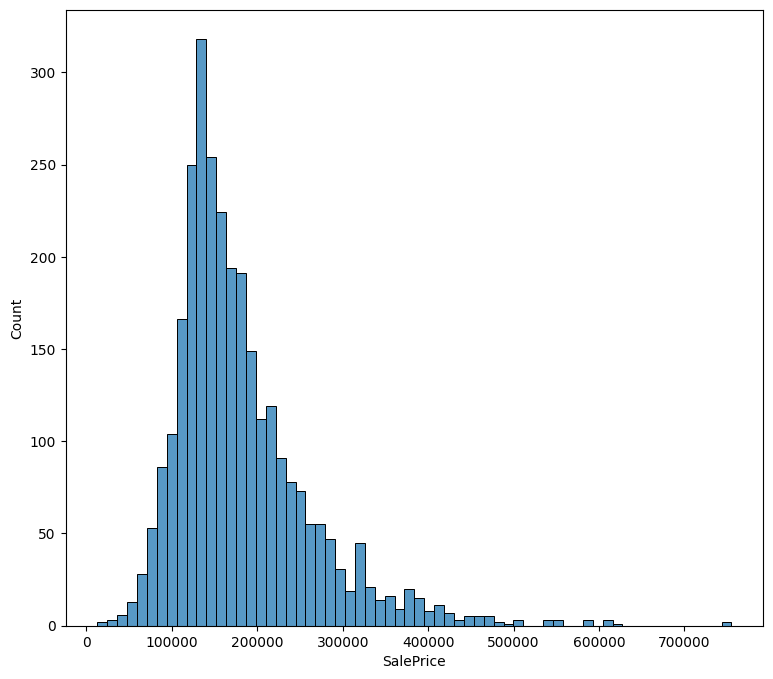

In [ ]:
plt.figure(figsize=(9, 8))
sns.histplot(my_data['SalePrice'])

The house price average is \$180 810.1. The standard deviation, which measures the spread of the house prices around the mean, is \$79 893.75. The smallest house price in the dataset is \$12 789 and the highest house price is \$755 000.

From the graph we can see that the distribution is skewed, precisely it is right skewed. This is also visible when looking at the different quartiles. Indeed, we can see that the median (\$ 160 000) is closer to the first quartile (\$129 500) than to the third one(\$213 500).

In order to deal with this skeweness, let's transform the house price variable using log transformations.

count    2926.000000
mean       12.021069
std         0.407508
min         9.456341
25%        11.771436
50%        11.982929
75%        12.271392
max        13.534473
Name: log_SalePrice, dtype: float64


<Axes: xlabel='log_SalePrice', ylabel='Count'>

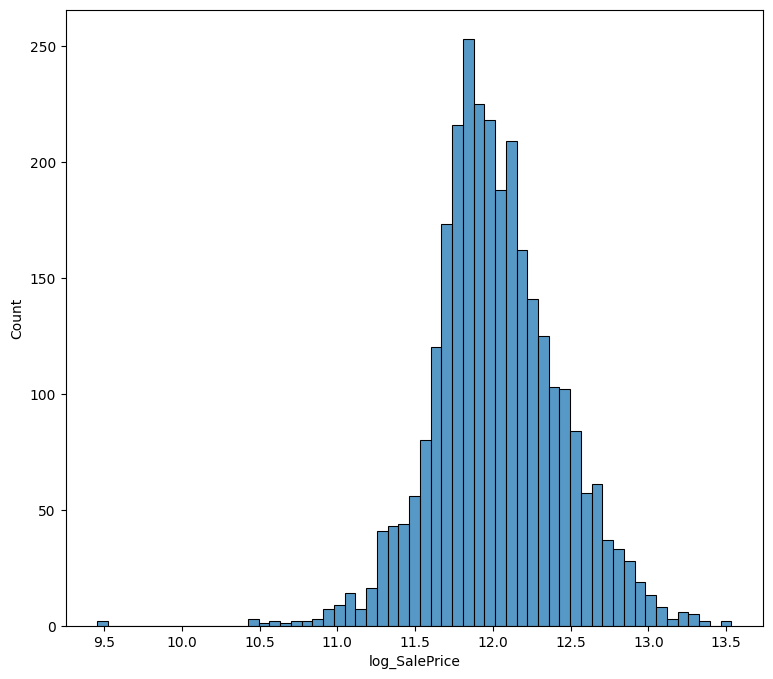

In [ ]:
my_data['log_SalePrice'] = np.log(my_data['SalePrice'])

print(my_data['log_SalePrice'].describe())

plt.figure(figsize=(9, 8))
sns.histplot(my_data['log_SalePrice'])

After this Log transformation, we can see that the distribution is pretty much symmetrical and similar to a Gaussian distribution with a mean equal to 12.02 and a standard deviation of 0.41.

Now, let's do some univariate visualization of qualitative and quantitative variables. Let us first plot the distributions of the numerical variables.

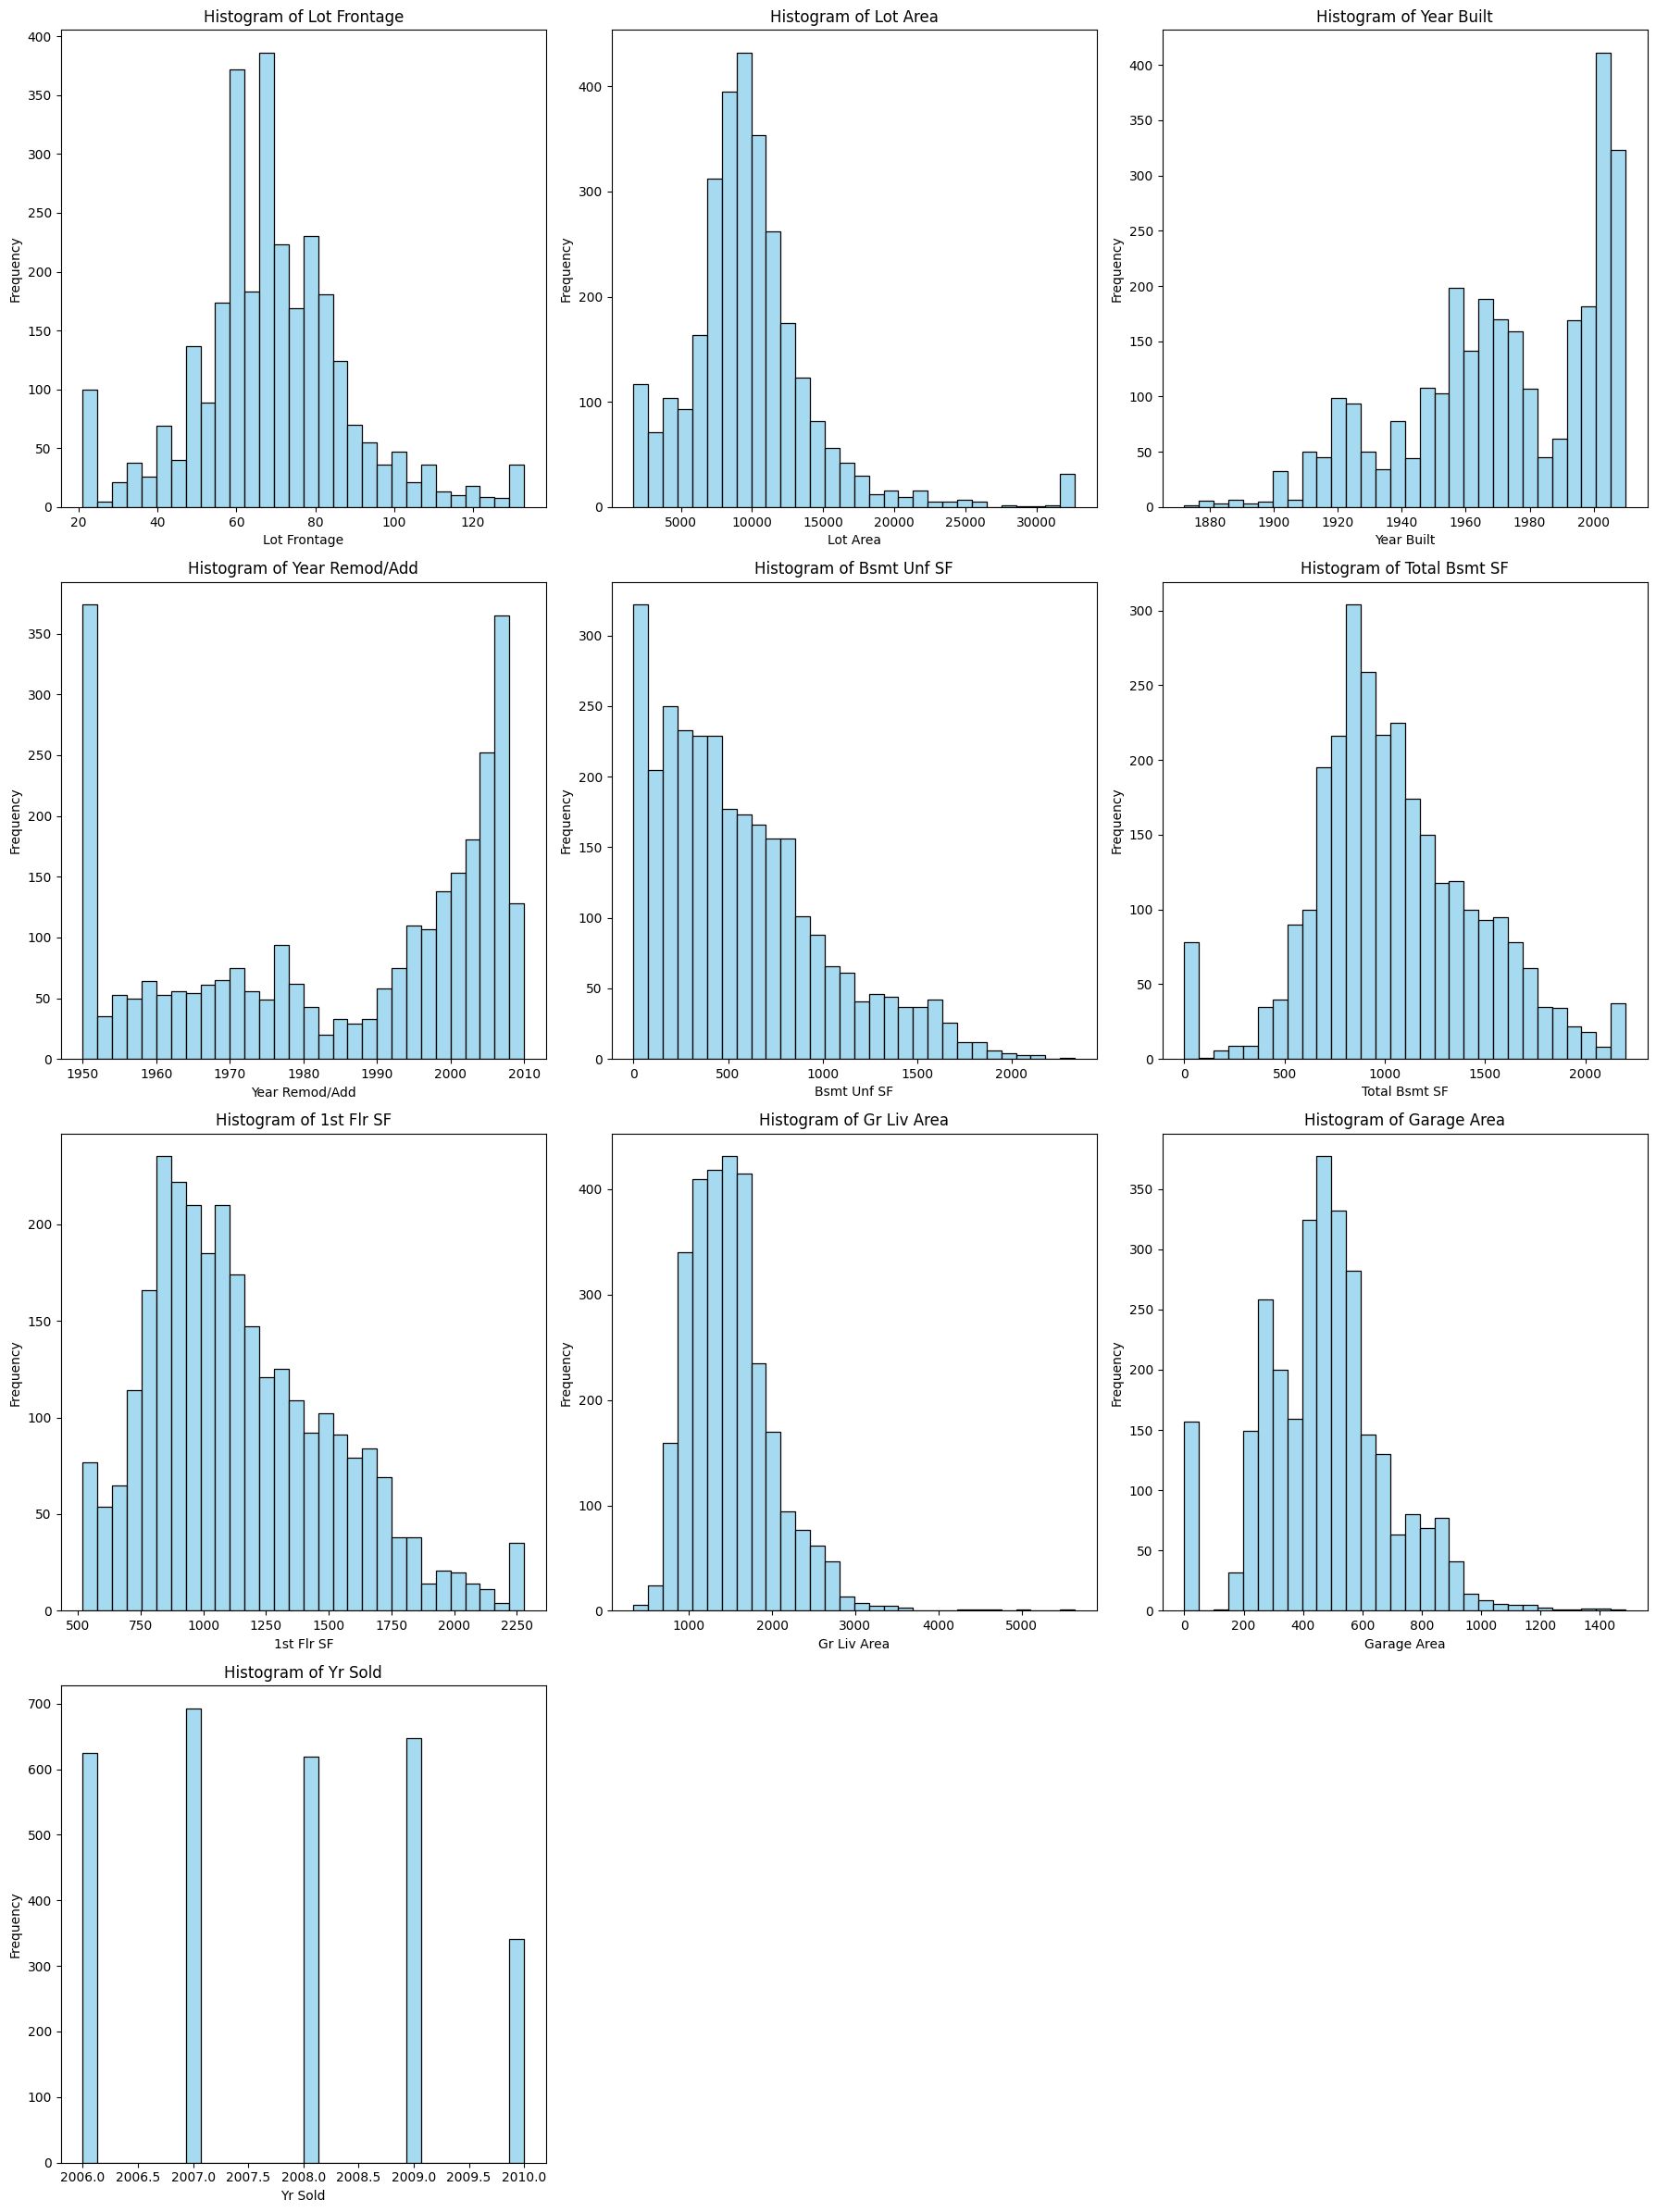

In [ ]:
def plot_quantitative_histogram(column, ax):
    sns.histplot(my_data[column], bins=30, kde=False, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

columns = my_data.select_dtypes(include=['float64', 'int64']).columns[2:-2]

num_columns = 3
num_rows = (len(columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows))

for i, column in enumerate(columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    plot_quantitative_histogram(column, ax)

for i in range(len(columns), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

plt.tight_layout()
plt.show()



Our quantitative variables are well distributed thanks to the pre processing treatment. We do not observe outliers or excessive "0" observations so we are happy with our data.

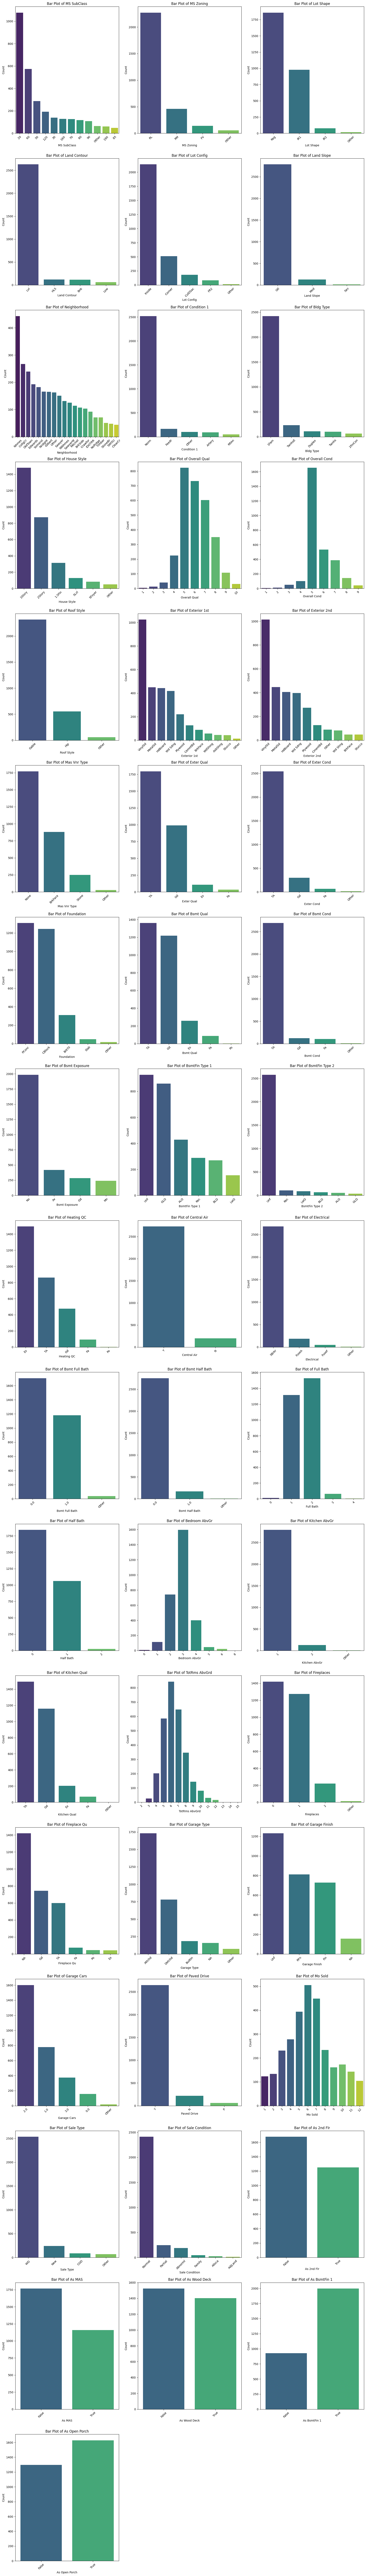

In [ ]:
def plot_categorical_barplot(column, ax):
    value_counts = my_data[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts, ax=ax, palette='viridis')
    ax.set_title(f'Bar Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

    if column in ['Year Built', 'Year Remod/Add']:
        n = 4
        ax.set_xticks(ax.get_xticks()[::n])

columns = my_data.select_dtypes(exclude=['float64', 'int64']).columns

num_columns = 3
num_rows = (len(columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * (num_rows+4)))

for i, column in enumerate(columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    plot_categorical_barplot(column, ax)

for i in range(len(columns), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

plt.tight_layout()
plt.show()


From the barplot of our qualitative variables, we can already see that there are much interesting variables than other.
We see for exemple that we do not have a lot of variability for : Land Contour, Land Slope, Condition 1, Bldg Type, Exter Cond, Bsmt Cond, BsmtFin Type 2, Central Air, Eletrical, Bsmt Half Bath, Kitchen AbvGr, Paved Drive.

Those variables might not be the most informative to our modelisation.

## Bivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Columns')

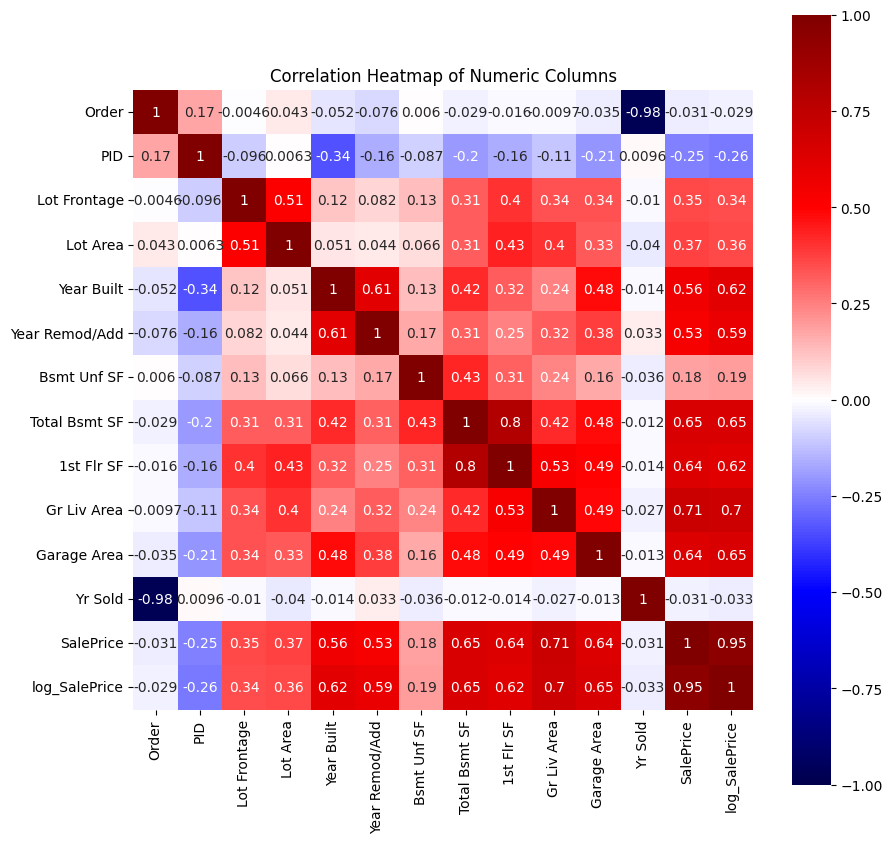

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(my_data.select_dtypes('number').corr(),vmax=1,vmin=-1, annot=True,square=True,cmap='seismic')
plt.title('Correlation Heatmap of Numeric Columns')

From correlation plot, we can see that :

  - Total Bsmt SF is highly related to 1stFlr SF, we might not use both for our modelisation.

For the other high correlations this is related to the variables we want to predict so this might be good.

## House price vs categorical variable

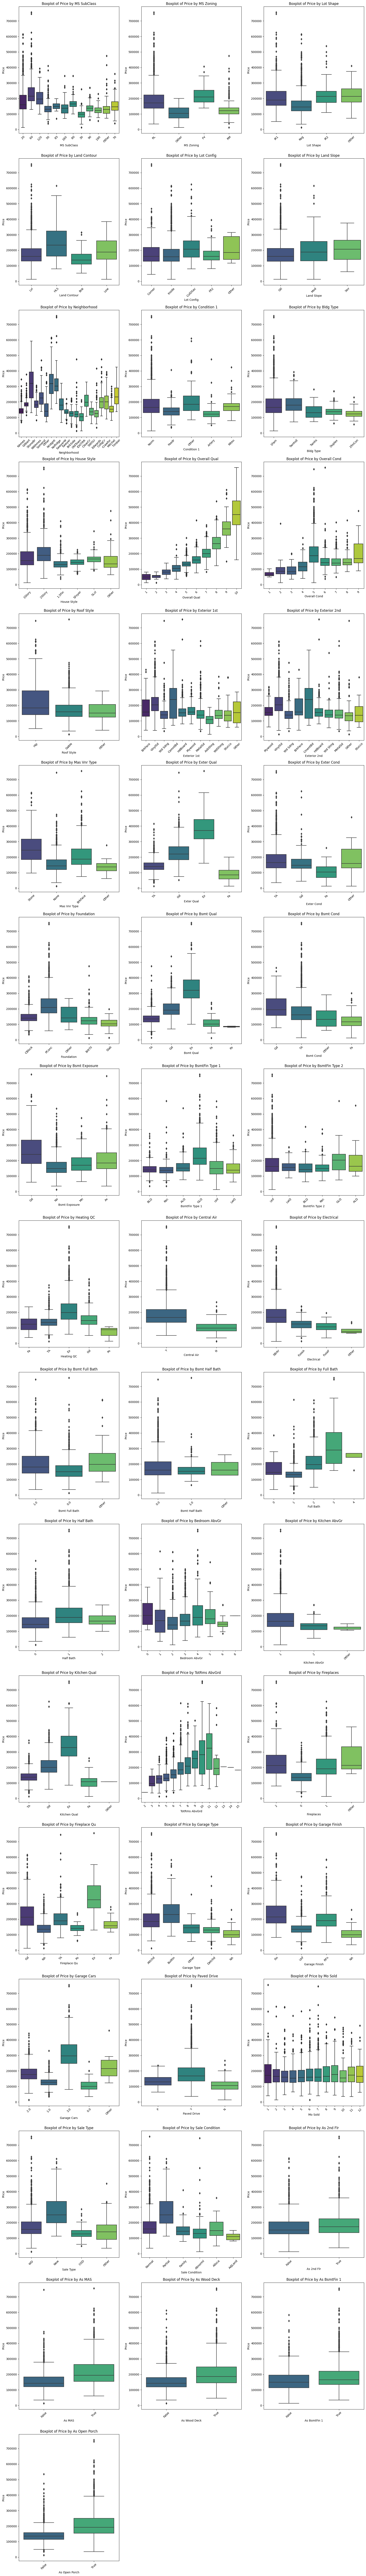

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_boxplot(column, ax):
    sns.boxplot(x=column, y='SalePrice', data=my_data, ax=ax, palette='viridis')
    ax.set_title(f'Boxplot of Price by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)
    if column in ['Year Built', 'Year Remod/Add']:
      n = 4
      ax.set_xticks(ax.get_xticks()[::n])


columns = my_data.select_dtypes(exclude=['float64', 'int64']).columns

num_columns = 3
num_rows = (len(columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * (num_rows + 4)))

for i, column in enumerate(columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    plot_categorical_boxplot(column, ax)

for i in range(len(columns), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

plt.tight_layout()
plt.show()


From this visualisation, we can clearly identify variables that will play an informative role : The Neighborhood, the overall quality, the overall conditions, also the year of construction (year built), the year Remod/Add variable, the exterior quality, the foundation, the fireplace, the garage type and the number of car we can put in, and many other caracteristics.




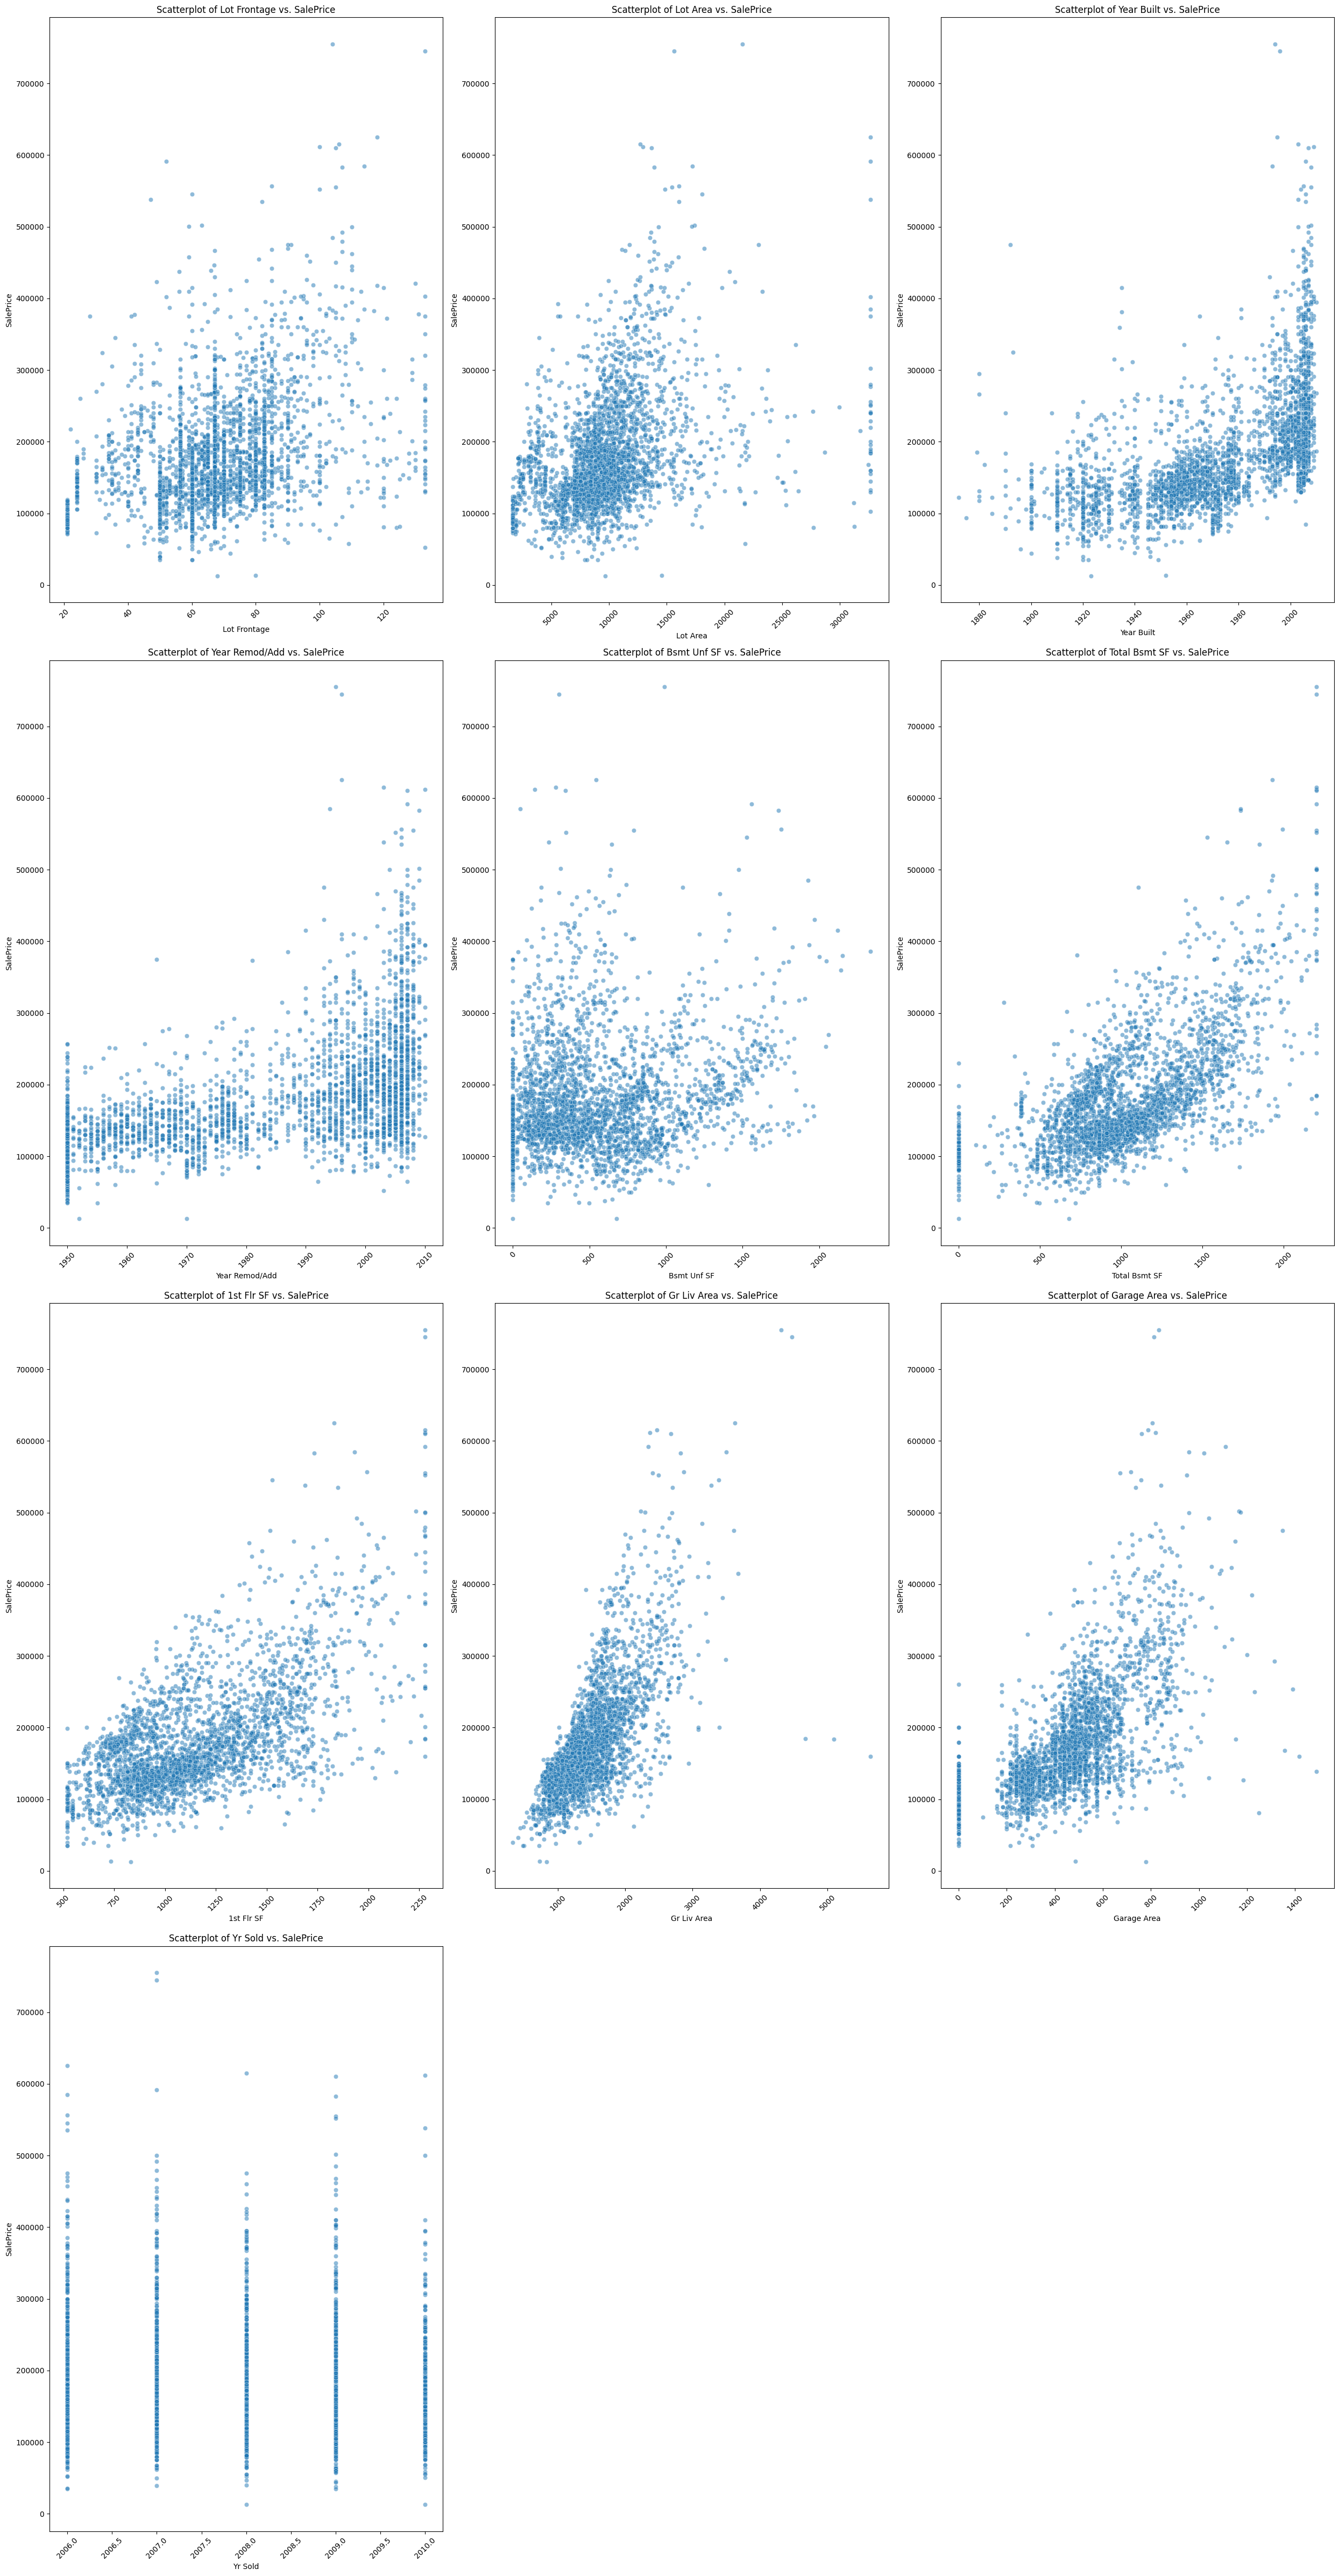

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_matrix(data, columns, num_columns):
    num_rows = (len(columns) + num_columns - 1) // num_columns

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(25, 6 * (num_rows + 4)))

    for i, x_column in enumerate(columns):
        row = i // num_columns
        col = i % num_columns
        if num_rows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col]

        sns.scatterplot(x=x_column, y='SalePrice', data=data, ax=ax, alpha=0.5)
        ax.set_title(f'Scatterplot of {x_column} vs. SalePrice')
        ax.set_xlabel(x_column)
        ax.set_ylabel('SalePrice')
        ax.tick_params(axis='x', rotation=45)

    for i in range(len(columns), num_rows * num_columns):
        row = i // num_columns
        col = i % num_columns
        if num_rows > 1:
            fig.delaxes(axes[row, col])
        else:
            fig.delaxes(axes[col])

    plt.tight_layout()
    plt.show()


quantitative_columns = my_data.select_dtypes(include=['float64', 'int64']).columns[2:-2]
num_columns = 3
plot_scatter_matrix(my_data, quantitative_columns, num_columns)


Exaclty like for the correlation plot we see the importance of the Garage Area, the living Area, and the 1st Flr square foot, and total basement square foot to predict the sale price.

## Multivariate analysis

For the multivariate analysis, we will do and describe the PCA, and K-means clustering. Before applying these two methods to the data, let us have a look at the theory behind them.

**Theory: Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. The main goal of PCA is to transform high-dimensional data into a new coordinate system, called the principal component space, where the data's variance is maximized along the new axes.

Here are the key steps and concepts behind Principal Component Analysis:
1. Centering the Data: We center the data by subtracting the mean of each feature. This step ensures that the data is centered around the origin.
2. Covariance Matrix Calculation: We compute the covariance matrix of the centered data. The covariance matrix provides information about the relationships between different features.
3. Eigendecomposition of Covariance Matrix: We calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the principal components, and the corresponding eigenvalues indicate the amount of variance captured by each principal component.
4. Selecting Principal Components: We rank the eigenvectors by their eigenvalues in decreasing order. The eigenvector with the highest eigenvalue corresponds to the first principal component, the second highest to the second principal component, and so on. These eigenvectors form the new basis for the principal component space.
5. Reducing Dimensionality: To reduce the dimensionality of the data, we select a subset of the top-k eigenvectors based on the desired amount of variance to retain. Typically, we choose the top eigenvectors that capture more than 70% of the total variance.
6. Data Transformation: The selected eigenvectors are used to transform the original data into the new principal component space. This transformation results in a set of uncorrelated variables (the principal components) that capture the maximum variance in the data.
7. Interpretation:The principal components can be interpreted as the directions in the original feature space along which the data varies the most. The first principal component accounts for the most variance, the second for the second most, and so on.

**Theory : K-means clustering**

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into groups, or clusters, based on similarity. The algorithm tries to minimize the variance within each cluster and maximize the variance between clusters. The k in k-means indicates the number of clusters that the algorithm will create.

Here are the key steps and concepts behind k-means clustering:

1. Initialization: Choose the number of clusters k, that you want to partition the data into. Then, we randomly select k cluster centroids in the feature space as the initial centroids (center of the cluster). Determining the optimal number of steps is crucial and there are common methods used such as the elbow method, the silhouette score, or domain knowledge.

2. Assignment Step: We assign each data point to the nearest cluster centroid. This is typically done using a distance metric, such as Euclidean distance.

3. Update Step: We recalculate the centroids of the clusters based on the current assignment of data points. The new centroid is the mean of all data points assigned to that cluster.

4. Iteration: We repeat the step 2 and 3 until the centroids no longer change, or until we reach the maximum number of iterations.

5. Final Result: The algorithm converges to a final set of cluster centroids and assigns each data point to the cluster that contains similar points.

Combining PCA and k-means clustering is a good idea because it helps to underline structure in non observable dimensional space and to project those structures into the principal component of the PCA.
It is more common to do PCA and then k-means but I think we loose informations doing clustering only on two components.


Now, let us put both methods in practise.

First, we organize our dataset. Given that our data consists of numerical values, it is essential to standardize it, as PCA is sensitive to the scale of the data.

In [ ]:
my_data_quant = my_data.select_dtypes(include='number')
my_data_quant = my_data_quant[['Lot Frontage', 'Lot Area', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Area','SalePrice']]
scaler = StandardScaler()
my_data_quant_std = scaler.fit_transform(my_data_quant)

# Create a new DataFrame with normalized data
my_data_quant_std = pd.DataFrame(my_data_quant_std, columns=my_data_quant.columns)



In [ ]:
my_data_quant_std.drop("SalePrice",axis=1)

Lot Frontage  Lot Area  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  \
0         3.225299  4.797440    -0.269857       0.080188    1.362202   
1         0.565195  0.388858    -0.658947      -0.398327   -0.705040   
2         0.615386  0.967610    -0.349495       0.681957    0.472744   
3         1.217674  0.287767     1.104474       2.569434    2.597107   
4         0.264052  0.871990    -0.961573      -0.287157   -0.617998   
...            ...       ...          ...            ...         ...   
2921     -1.593002 -0.417457    -0.854630      -0.105901   -0.413994   
2922     -0.081087 -0.210025    -0.729484      -0.441829   -0.688720   
2923     -0.338236  0.130443     0.035044      -0.325825   -0.503756   
2924      0.414623  0.036136    -0.829601       0.826962    0.635947   
2925      0.264052 -0.047668    -0.731759      -0.122819   -0.433035   

      Gr Liv Area  Garage Area  
0        0.311588     0.256389  
1       -1.197003     1.195627  
2       -0.337503    -0.747944  
3        1.212773     0.228491  
4        0.257994     0.042504  
...           ...          ...  
2921    -0.984609     0.535371  
2922    -1.185093     0.051803  
2923    -1.050114    -2.198647  
2924    -0.218404    -0.255077  
2925     0.994424     0.823651  

[2926 rows x 7 columns]

Then, we run the k-means algorithm with 3 clusters and the PCA selecting the first four components.

In [ ]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(my_data_quant_std)
n_components = 4
pca = PCA(n_components=n_components)
data_pca=pca.fit_transform(my_data_quant_std)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Then, we check the explained variance of each component of PCA.

In [ ]:
pca.explained_variance_ratio_

array([0.50166734, 0.13939154, 0.10942713, 0.07730562])

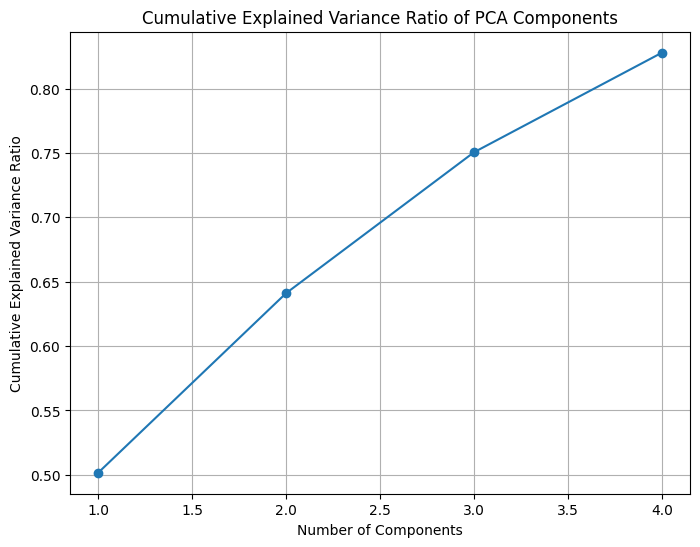

In [ ]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the importance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance Ratio of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

We see that the first two components explain barely 65% of the variance of the dataset which is not bad.

Now, let's look at the variable contribution to each component. We propose the following representation in barplot :

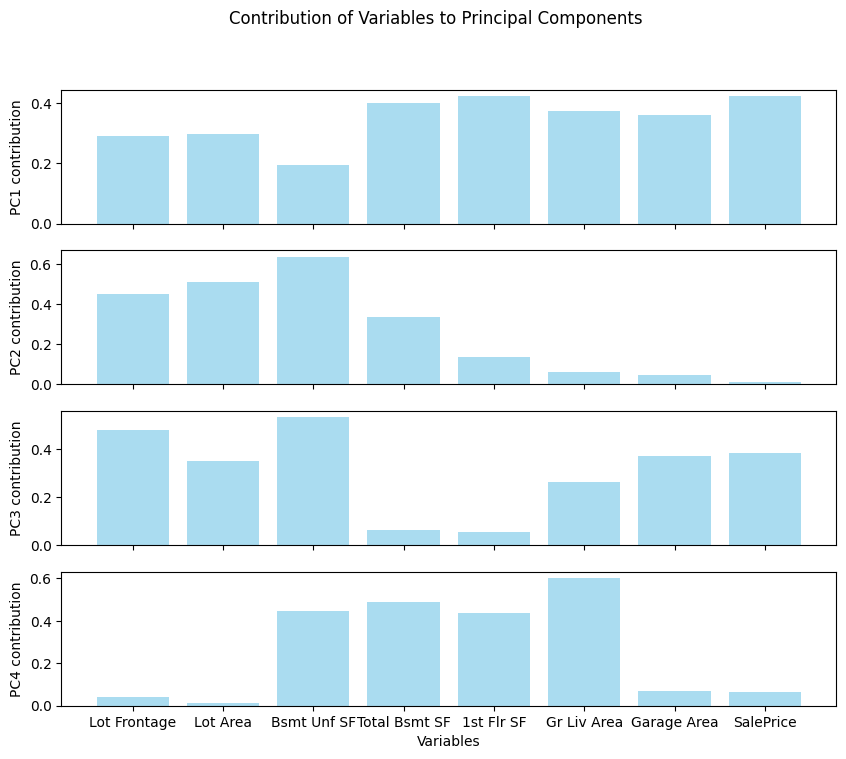

In [ ]:
fig, axes = plt.subplots(nrows=n_components, ncols=1, figsize=(10, 8), sharex=True)
loadings = np.abs(pca.components_)

for i in range(n_components):
    axes[i].bar(my_data_quant.columns, loadings[i, :], color='skyblue', alpha=0.7)
    axes[i].set_ylabel(f'PC{i + 1} contribution')

plt.xlabel('Variables')
plt.suptitle('Contribution of Variables to Principal Components')
plt.show()

We see that the contribution is homogenous in component 1, this component represent most of the quantitative variable of the dataset.

Lot Frontage, Lot Area, Bsmt Unf SF and Total Bsmt SF have a lot of contribution in the second component.

Lot Frontage, Lot Area, Bsmt Unf SF, Gr Liv Area, Garage Area  and SalePrice have a lot of contribution in  the third one.

Bsmt Unf SF, Total Bsmt SF, 1st Flr SFn and Gr Liv Area contribute a lot to fourth component.

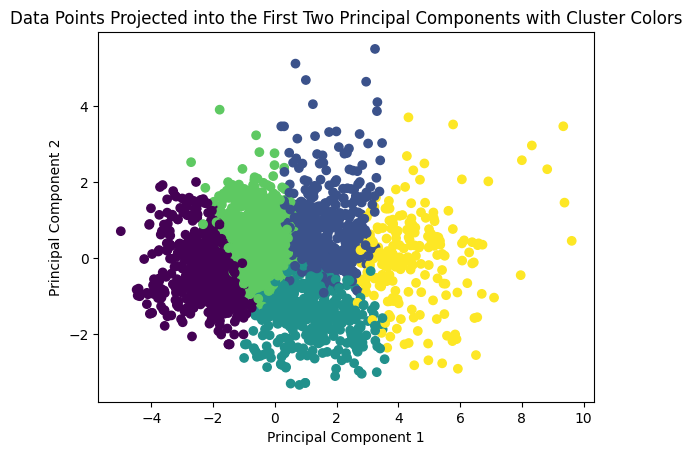

In [ ]:
# Plot the data points with colors indicating their cluster assignments
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.title('Data Points Projected into the First Two Principal Components with Cluster Colors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The clustering over all the dimension looks great projected in principal components space. This is because PCA capture well the variability within the two first components. We do not have a lot of overlapping in this representation.



We clearly see that we have a cluster by level of the first component. However, looking at the following plot with a SalePrice gradient we can see that the cluster correspond to a standing level of house. The highest the first component, the highest the SalePrice.

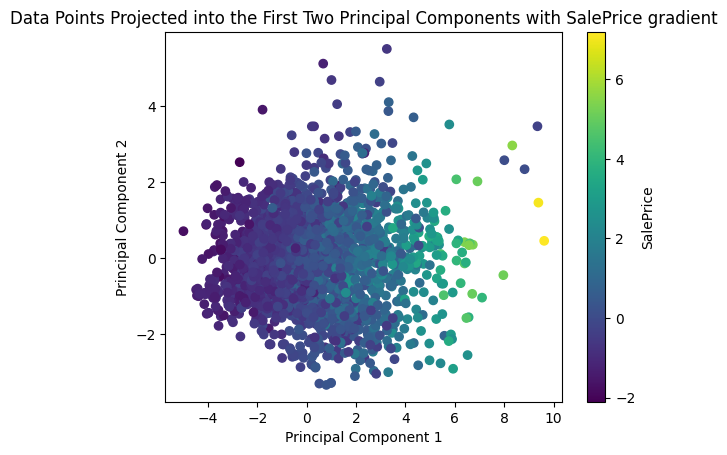

In [ ]:
# Create a DataFrame for Plotly
df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df['Cluster'] = labels
# Add to df 'SalePrice'
df['SalePrice'] = my_data_quant_std['SalePrice']

# Plot a gradient of color of SalePrice in the two first component
plt.scatter(df['PC1'], df['PC2'], c=df['SalePrice'], cmap='viridis')
plt.title('Data Points Projected into the First Two Principal Components with SalePrice gradient')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='SalePrice')  # Add colorbar for reference
plt.show()


We can also have a look the the first three components in 3D plot. They give the exact same conclusion.

In [ ]:


# Plot 3D scatter plot using Plotly Express
fig = go.Figure()

# Scatter plot for data points
fig.add_trace(
    go.Scatter3d(
        x=df['PC1'],
        y=df['PC2'],
        z=df['PC3'],
        mode='markers',
        marker=dict(size=2, color=df['Cluster'], opacity=0.9),
        name='Data Points'
    )
)

# Scatter plot for cluster centers
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
fig.add_trace(
    go.Scatter3d(
        x=cluster_centers_pca[:, 0],
        y=cluster_centers_pca[:, 1],
        z=cluster_centers_pca[:, 2],
        mode='markers',
        marker=dict(size=5, color='red', symbol='x'),
        name='Cluster Centers',
    )
)

# Update layout for better visualization
fig.update_layout(
    title='Data Points in 3D with Cluster Colors',
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3'),
    ),
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



In [ ]:
# Plot 3D scatter plot using Plotly Express with color gradient based on 'SalePrice'
fig = px.scatter_3d(
    df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='SalePrice',
    opacity=0.8,
    size_max=10,
    labels={'SalePrice': 'Sale Price'},
    title='Sale Price Gradient',
)


# Show the plot
fig.show()

# Prediction algorithm

In this section we are going to run models with the default values. We will try to optimize them in the next section.

First, we have to transform the categorical variables to dummies. An divide the dataset into training and testing sets.

In [ ]:
categorical_columns = my_data.select_dtypes(include=['object']).columns

In [ ]:
my_data = pd.get_dummies(my_data, columns=categorical_columns, drop_first=True)

<ipython-input-9-6421979232a6>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  my_data = pd.get_dummies(my_data, columns=categorical_columns, drop_first=True)
<ipython-input-9-6421979232a6>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  my_data = pd.get_dummies(my_data, columns=categorical_columns, drop_first=True)
<ipython-input-9-6421979232a6>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  my_data = pd.get_dummies(my_data, columns=categorical_columns, drop_first=True)
<ipython-input-9-6421979232a6>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  my_data = pd.get

In [ ]:
X= my_data.drop(['log_SalePrice', 'SalePrice'],axis=1)
y= my_data['log_SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Multiple Linear Regression

**Theory: Multiple Linear Regression**

Multiple linear regression is a supervised learning algorithm that attempts to predict the relationship between a dependent variable and two or more independent variables by fitting a linear equation to observed data.

The formula of the model is:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + … + \beta_p​x_p + \epsilon $$

Where $y$ is the dependent variable (here the house price), $\beta_0​,\beta_1​,\beta_2​,...,\beta_p​ $ are the coefficients (parameters) to be estimated,
$x_1​,x_2​,...,x_p$​ are the independent variables (features), and $\epsilon$ represents the error term1.

To determine the line best fits the data, the model evaluates different coefficient combinations that best fit the data and establishes a strong relationship between the variables.

In addition, the model also uses a cost function to optimize the weights. In general, for a linear regression, the cost function is the mean squared error (MSE):

$$MSE = \frac{1}{N} \sum \limits_{i=1}^n (y_i - (mx_i + b))^2$$

where N is the total number of observations, y_i is the actual value of an observation, and mx_i+b is the prediction.

The MSE s a measure of the average squared difference between the actual and predicted values. Thus, lower values indicate a better fit.

Statistical modelling issues:

- Multiple linear regression has several assumptions:
  1. Linearity: The relationship between the independent and dependent variables is linear
  2. Independence:  The observations are independent of each other.
  3. Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
  4. Normality: The data follows a normal distribution.

  Thus, if these assumptions are violated, the model’s predictions may be unreliable.

- Overfitting and Underfitting: If a model is too complex (i.e., too many predictors), it may fit the noise in the data, leading to overfitting. On the other hand, a model that is too simple may not capture important relationships, leading to underfitting.

- Multicollinearity: This occurs when two or more predictors in the model are correlated. It can make the model’s estimates unstable and difficult to interpret.

Optimization Issues:
- Least Squares Optimization: Linear regression typically uses least squares optimization to find the best fit line. However, this method can be sensitive to outliers, which can significantly influence the line of best fit.

- Regularization: Techniques like Lasso and Ridge regression introduce a penalty term to the loss function to prevent overfitting. Choosing the right regularization parameter is crucial for good performance.

Now, let's do a Linear Regression.

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

predictions_lr = model_lr.predict(X_test)

Let's evaluate the model.

In [ ]:
mse = mean_squared_error(y_test, predictions_lr)
r2 = r2_score(y_test, predictions_lr)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.018727661626283986
R-squared: 0.8866358935795657


Let's plot the predictions agains the actual values.

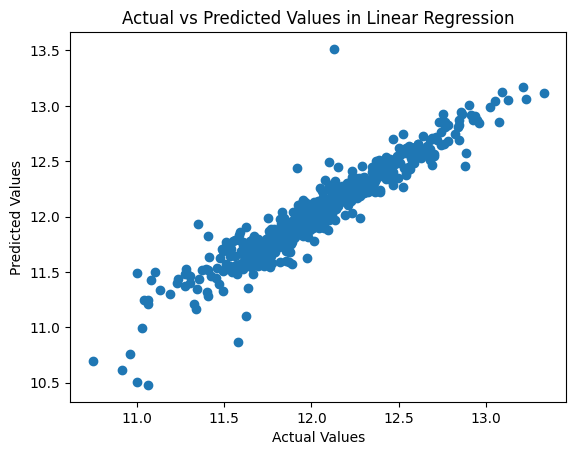

In [ ]:
plt.scatter(y_test, predictions_lr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in Linear Regression')
plt.show()

The MSE of our model is 0.0187, we will use it as a baseline measure for the futur models.

We obtained an R-squared of 0.887 meaning that approximately 88.66% of the variability in house prices can be explained by the other variables in the model. This is generally considered a good fit, as it’s quite close to 1.

We can also see on the graph that we obtained pretty good results since the predicted values are close to the actual values.

## Lasso Regression

**Theory: Lasso Regression**

We have seen that we can use a Lasso regression to introduce a penalty term to the loss function to prevent overfitting.

Lasso regression starts with the standard linear regression model, which assumes a linear relationship between the independent variables (features) and the dependent variable (target). It then introduces an additional penalty term based on the absolute values of the coefficients:

$$ L_1 = \lambda * (|\beta_1|+|\beta_2|+...+|\beta_p|)$$

where $\lambda$ is the regularization parameter that controls the amount of regularization applied, and $\beta_0​,\beta_1​,\beta_2​,...,\beta_p​ $ are the coefficients.

Adding this penalty term allows the model to find a balance between simplicity and accuracy.

Its objective is to find the values of the coefficients that minimizes the residual sum of squares (the sum of the squared differences between the predicted values and the actual values) while also minimizing the $L_1$ regularization term:

$$\min\limits_{\beta_1​,\beta_2​,...,\beta_p} RSS + L_1$$

Also, it is important to know that lasso is very sensitive to scale, thus we will procede to a standardization before modeling.

Now, let's do a Lasso Regression.

In [ ]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)
predictions_lasso = model_lasso.predict(X_test_scaled)

Let's evaluate the model.

In [ ]:
mse = mean_squared_error(y_test, predictions_lasso)
r2 = r2_score(y_test, predictions_lasso)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0342312591411912
R-squared: 0.7927880062323902


In [ ]:
alphas = np.logspace(-4, 2, 100)  # Adjust the range based on your preference

# Initialize an array to store the coefficients for each alpha
coefs = []

# Fit the Lasso model for each alpha and store the coefficients
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)
    coefs.append(lasso_model.coef_)

# Convert the list of coefficients to a NumPy array
coefs = np.array(coefs)

# Plot the evolution of the coefficients as a function of alpha
plt.figure(figsize=(12, 8))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f'Feature {i+1}')

plt.xscale('log')  # Set x-axis to a logarithmic scale for better visualization
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Coefficient Value')
plt.title('Evolution of Coefficients in Lasso Regression')
plt.legend()
plt.show()

Let's plot the predictions agains the actual values.

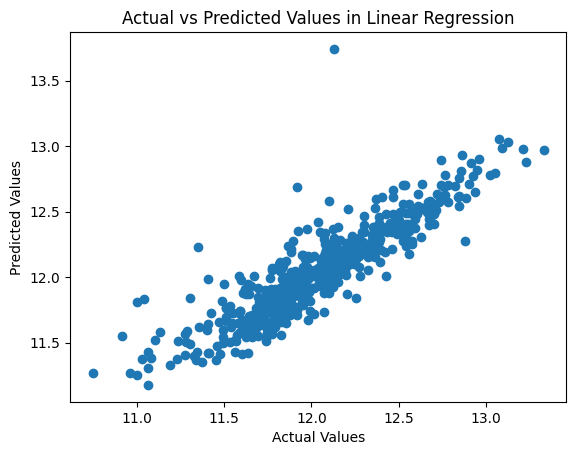

In [ ]:
plt.scatter(y_test, predictions_lasso)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in Linear Regression')
plt.show()

The MSE of your Lasso regression model is 0.0342, which is higher than the MSE of 0.0187 from the multiple linear regression model. This suggests that, on average, the Lasso model’s predictions are somewhat less accurate.

The R-squared of your Lasso model is 0.7928, which is lower than the 0.8866 from the multiple linear regression model. This means that the Lasso model explains less of the variability in your target variable compared to the multiple linear regression model.

## Random Forest

**Theory: Random Forest**

Random Forest regression is a supervised learning algorithm and bagging technique that construct a multitude of decision trees at training time and returns the mean prediction of the individual trees.The main idea behind Random Forest is to combine the predictions made by many decision trees into a single model.

The algorithm fro Random Forest regression can be summarized as follows:
1. For all individual trees ($b$) in the forest ($B$):
  - Draw a bootstrap sample Z of size N from the training data.
  - Grow a random-forest tree $T_b$ to the bootstrapped data, by recursively repeating the following steps for each terminal node of the tree, until the minimum node size nmin is reached.
    - Select m variables at random from the p variables.
    - Pick the best variable/split-point among the m.
    - Split the node into two daughter nodes.
2. Return the ensemble $\{T_b\}_{b=1}^B$ that represents the collection of all B trees in the Random Forest.

3. For a new input data point x, each tree makes its own prediction, and the final prediction of the model is the average of these individual tree predictions: $\hat{f}_B(x) = \frac{1}{B} \sum_{b=1}^{B} T_b(x)$


Statistical Modelling Issues:
- Extrapolation: Random Forests can’t extrapolate outside unseen data. This means if the new data is outside the range of the training data, the model might not provide reliable predictions.

- Correlation: Random Forests assume that the observations are independent. If this assumption is violated, the model’s predictions may be unreliable.

- Variable Importance: Random Forests can give biased importance scores for predictors, especially if predictors vary in their scale of measurement or their number of categories.

Optimization Issues:
- Hyperparameters: Random Forests have several hyperparameters (like the number of trees, maximum depth of trees, etc.) that need to be tuned for optimal performance.

- Computational cost: Random Forests can be computationally intensive and require more memory as they involve building numerous decision trees.

- Model Interpretability: While Random Forests generally perform well in terms of prediction accuracy, they are not as interpretable as simpler models like linear regression or decision trees.

Now let's do a Random Forest with the default parameters.

In [ ]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

Let's evaluate the model.

In [ ]:
mse = mean_squared_error(y_test, predictions_rf)
r2 = r2_score(y_test, predictions_rf)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.021508191611038667
R-squared: 0.8698045185052456


Let's plot the predictions agains the actual values.

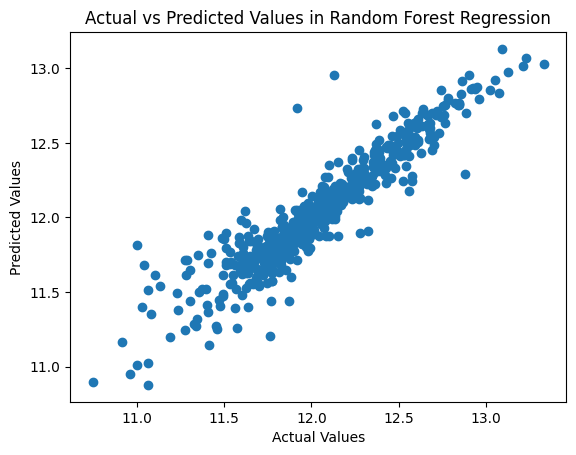

In [ ]:
plt.scatter(y_test, predictions_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in Random Forest Regression')
plt.show()

The Mean Squared Error (MSE) of the Random Forest regression model is 0.0184, which is very close to the MSE of the multiple linear regression model (0.0187). This suggests that, on average, the Random Forest model’s predictions are almost as accurate as those of the multiple linear regression model.

The R-squared of the Random Forest model is 0.8884, which is slightly higher than the 0.8866 from the multiple linear regression model. This means that the Random Forest model explains a slightly larger proportion of the variability in your target variable compared to the multiple linear regression model.

We are going to preceed to try to optimize the hyperparameter in the following section.

## XGBoost

**Theory: XGBoost**

XGBoost (extreme gradient boosting) is a supervised machine learning method for classification and regression. This method is based on decision trees and improves on other methods such as random forest and gradient boost. It works well with large, complicated datasets by using various optimization methods.

The algorithm for XGBoost regression can be summarized as follows:
1. Initialize model with a constant value:
$$ \hat{y}_i^{(0)} = \underset{\gamma}{\text{argmin}} \sum_{i=1}^{n} l(y_i, \gamma)$$
where $y$ is the target variable that we’re trying to predict (here the house price), $\hat{y}$ is the predicted value of the target variable, $n$ is the total number of observations in the datase, and $\gamma$ is the optimal value that minimizes the loss function within each leaf.
2. For every iteration ($m$) in the boosting process ($M$ total number of iterations), we do:
  - Compute:
  $$ g_i = \partial_{\hat{y}_i^{(m-1)}} l(y_i, \hat{y}_i^{(m-1)}) \quad \text{and} \quad h_i = \partial_{\hat{y}_i^{(m-1)}}^2 l(y_i, \hat{y}_i^{(m-1)})\ $$ for $i = 1, ..., n$
  - Fit a tree to the residuals $(g_i, h_i)$, $i = 1, ..., n$, and create terminal regions $R_{jm}$, for $j = 1, ..., J$ (where J is the total number of terminal nodes).
  - For $j = 1, ..., J$, compute:
  $$ \gamma_{jm} = \underset{\gamma}{\text{argmin}} \sum_{i \in R_{jm}} [g_i \gamma + \frac{1}{2}(h_i + \lambda)\gamma^2] $$
  - Update $\hat{y}_i^{(m)} = \hat{y}_i^{(m-1)} + \eta \sum_{j=1}^{J} \gamma_{jm} I(x_i \in R_{jm})$

3. Return $\hat{f}(x) = \hat{y}_i^{(M)}$.

The objective function that needs to be minimized at each iteration $t$ is given by:

$$ \text{Obj}^{(t)} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{i=1}^{t} \Omega(f_i)$$

where $l$ is a differentiable convex loss function that measures the difference between the actual and predicted target variable, and $\Omega$ is a regularization term that penalizes the complexity of the model.

The second-order Taylor approximation of the objective function is:

$$\text{Obj}^{(t)} \approx \sum_{i=1}^{n} [l(y_i, \hat{y}_i^{(t-1)}) + g_i(f_i - \hat{y}_i^{(t-1)}) + \frac{1}{2} h_i (f_i - \hat{y}_i^{(t-1)})^2] + \Omega(f_i)$$

where $g_i$ and $h_i$ are the first and second order gradient statistics of the loss function

The similarity score, which helps in growing the tree, is given by:

$$\text{Similarity Score} = \frac{(\text{Sum of residuals})^2}{\text{Number of residuals} + \lambda}$$

Now let's do a XGBoost with the default parameters. We need to specify objective='reg:squarederror' to do a regression.

In [ ]:
model_xgb = XGBRegressor(objective='reg:squarederror')
model_xgb.fit(X_train, y_train)

predictions_xgb = model_xgb.predict(X_test)

Let's evaluate the model.

In [ ]:
mse = mean_squared_error(y_test, predictions_xgb)
r2 = r2_score(y_test, predictions_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.017784299508071887
R-squared: 0.892346345086865


Let's plot the predictions agains the actual values.

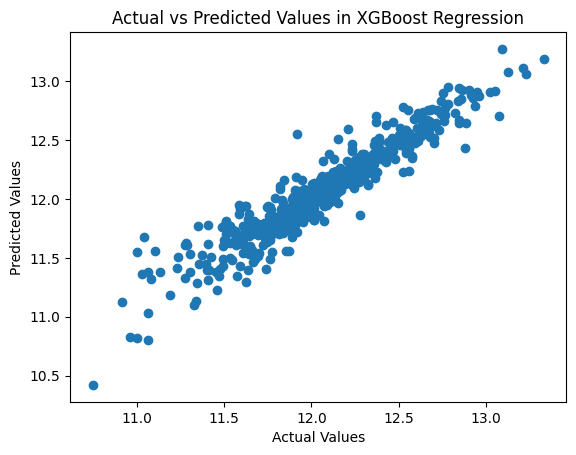

In [ ]:
plt.scatter(y_test, predictions_xgb)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in XGBoost Regression')
plt.show()

The Mean Squared Error (MSE) of the XGBoost model is 0.0178, which is lower than the MSE of the multiple linear regression model (0.0187). This suggests that, on average, the XGBoost model’s predictions are more accurate.

The R-squared of the XGBoost model is 0.8923, which is higher than the 0.8866 from the multiple linear regression model. This means that the XGBoost model explains more of the variability in your target variable.

## Neural Networks

**Theory: Neural Networks**

Neural networks are computational models inspired by the structure and functioning of biological neural networks in the human brain. Here are some key theoretical aspects of neural networks applied to regression problem:

\
1. The perceptron :

The basic idea behind a perceptron is to learn how to predict a variable of interest, $Y$. It takes as input explanatory variables denoted $X$.

Each input is associated with a weight. The weights represent the importance of the respective inputs in making the decision. A higher weight means the input is more influential. Exactly like multiple linear regression.

The perceptron compute the following weighted sum :

$$f(x)=\beta_0 + \beta_1x_1 + \beta_2x_2 + … + \beta_p​x_p $$

where $f(x)$ is the output of a neuron.

\
2. Activation function :

Neurons use activation functions to introduce non-linearity into the network. In our case of linear regression, we could use relu or linear activation function.

\begin{align*}
g(\mathbf{x}) = activation(f(x)),
\end{align*}

\
3. Layers :

Neurons are organized into layers. A neural network can have multiple layers depending on the complexity of the architecture. The last layer is a unique neuron that output the prediction $\hat{Y}$.

\
4. Weights and connection:

As said before,  each inputs variable of $X$ as a weight in a neuron. Also, the output of a neuron has a weight. Meaning that the first layer compute $g(f(x))$ for each neurons and then the second layer takes as input the ouput of each neurons of the last layer with a specific weight for each neurons.
This cascade of layers continue until the last layer.


This is described by the following equation :

$$\hat{y} = g(f(g(f(\dots(g(f(x)))))))$$

\
5. The loss

A loss function measures the difference between the predicted output and the actual target. During training, the goal is to minimize this loss by adjusting the weights of the network.

In general, we use the Mean Squared Error (MSE) when doing regression since it penalizes large mistakes:

$$L(y, \hat{y}) = (y - \hat{y}) ^ 2$$

\
6. Forward propagation :

Forward propagation is the process of going from input data to prediction and finaly to a loss with initialized weights. From what we have seen there is nothing about learning, we have just seen how the data go through the network.
The learning part is in backward propagation.

\
7. Backward propagation :

The idea of backward propagation is to adjust the weights of all the neural network in order to minimize the loss.
Since there is no close formula of the loss which would enable to solve the equation gradient equal zero, we need to use optimizer.
There are a bunch of optimizer such as gradient descent, stochastic gradient descent, Adagrad, Adam...

They work differently but have the same objective, find the weights that locate the global minimum of the loss between reality and what the network forecast.

\
8. Optimizer :

Depending on the optimize used, since they do work differently, we need to tune the hyperparameter in the right way in order to get the best performance : lowest loss. For exemple, we could tune the learning rate which correspond to the length of the step we do in the loss space. It means that a low learning rate would lead to slow convergence to the global optima and a high risk of being stuck in local optima for some algorithm, or invertly a high learning rate which could result in divergence of the loss.
Depending on the optimization method there are other parameters to tune such as momentum, batch size...


We will use the deep learning libraries TensorFlow and Keras. Let's build a simple feedforward neural network for regression.

First, it is recommended to standardize the features when working with neural networks.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

We create the structure of the neural network :

In [ ]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256,input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1,activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.009))
NN_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 256)               104704    
                                                                 
 dense_101 (Dense)           (None, 256)               65792     
                                                                 
 dense_102 (Dense)           (None, 256)               65792     
                                                                 
 dense_103 (Dense)           (None, 256)               65792     
                                                                 
 dense_104 (Dense)           (None, 1)                 257       
                                                                 
Total params: 302337 (1.15 MB)
Trainable params: 302337 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = NN_model.fit(X_train_scaled, y_train, epochs=60, batch_size=40, validation_data=(X_test_scaled, y_test), verbose=1)

predictions = NN_model.predict(X_test_scaled)

Epoch 1/60
59/59 [==============================] - 1s 21ms/step - loss: 0.4635 - val_loss: 1.3038
Epoch 2/60
59/59 [==============================] - 1s 17ms/step - loss: 0.4342 - val_loss: 1.1492
Epoch 3/60
59/59 [==============================] - 1s 18ms/step - loss: 0.6633 - val_loss: 1.7987
Epoch 4/60
59/59 [==============================] - 1s 16ms/step - loss: 0.4489 - val_loss: 1.8202
Epoch 5/60
59/59 [==============================] - 1s 15ms/step - loss: 0.4967 - val_loss: 1.1772
Epoch 6/60
59/59 [==============================] - 1s 15ms/step - loss: 0.2422 - val_loss: 0.9095
Epoch 7/60
59/59 [==============================] - 1s 15ms/step - loss: 0.1057 - val_loss: 0.8066
Epoch 8/60
59/59 [==============================] - 1s 14ms/step - loss: 0.0848 - val_loss: 0.6978
Epoch 9/60
59/59 [==============================] - 0s 8ms/step - loss: 0.0569 - val_loss: 1.0159
Epoch 10/60
59/59 [==============================] - 0s 8ms/step - loss: 0.0457 - val_loss: 0.7775
Epoch 11/60

Let's evaluate the model.

In [ ]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.07864975323200397
R-squared: 0.5239096490925359


Let's plot the training history.

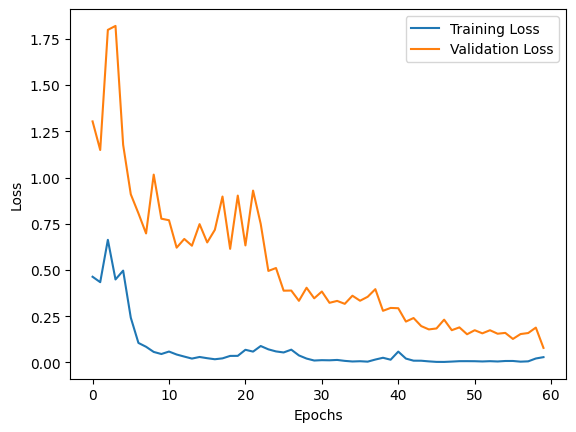

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Here we see the convergence of the loss trough the step, which means that we are getting closer and closer to a minimum. The algorithm learn.

Let's plot the predictions agains the actual values.

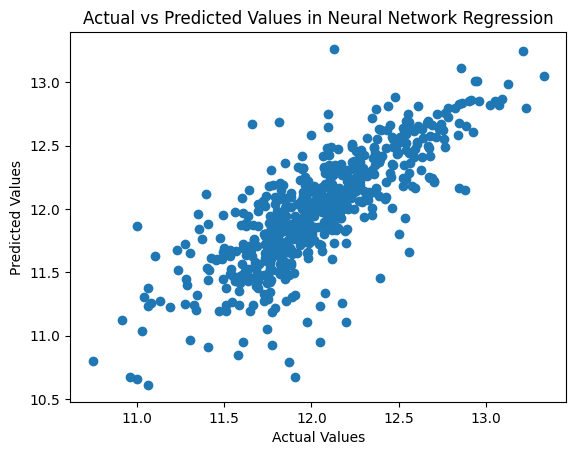

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in Neural Network Regression')
plt.show()

The prediction looks good but the algorithm is not well tuned, it needs to be optimized.

# Hyperparameter optimization

The goal of this part is to optimize the algorithm performance. We use a grid search to compare various parametrization of the model and we conclude by comparing them using MSE criteria.

## Lasso regression

In [ ]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [ ]:
model = Lasso()

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [ ]:
grid.fit(X_train_scaled, y_train)
print(grid.best_score_,grid.best_estimator_.alpha)

0.8660789100449497 0.01


In [ ]:
predictions_best_lasso = grid.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions_best_lasso)
r2 = r2_score(y_test, predictions_best_lasso)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.021317255071369036
R-squared: 0.8709603141744859


We improved a lot the modelisation, we have a way higher R-squared and lower mse.

## Random Forest

First, we define the parameter grig for the grip search.

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 10, 20]
}

Next, we performe the grid search. It takes around 25 minutes to run (on our personal computer, it might change depending on the computer).

In [ ]:
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params_rf = grid_search.best_params_

We train the model with the best parameters.

In [ ]:
best_rf_model = RandomForestRegressor(random_state=42, **best_params_rf)
best_rf_model.fit(X_train, y_train)

predictions_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_best_rf)
r2 = r2_score(y_test, predictions_best_rf)

print(f'Best Parameters: {best_params_rf}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.020624115605744456
R-squared: 0.8751560935362289


We are better in terms of R-squared and MSE with this new model.

## XGBoost

First, we define the parameter grig for the grip search.

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

Next, we performe the grid search. It takes around ?? minutes to run (on our personal computer, it might change depending on the computer).

In [ ]:
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params_xgb = grid_search.best_params_

We train the model with the best parameters.

In [ ]:
predictions_best_xgb = grid_search.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_best_xgb)
r2 = r2_score(y_test, predictions_best_xgb)

print(f'Best Parameters: {best_params_xgb}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Mean Squared Error: 0.01597687142862429
R-squared: 0.9032872448764152


We are sligthly less better in R-squared with this new model, this might be due to the fact that the grid search is not large enough. This is our best model.

## Neural Networks

Let's optimize the hyperparameters of the neural networks.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
reg = MLPRegressor()

max_iter_values = [25, 50]
batches = [10, 30, 50]
optimizers = ['adam', 'sgd']
neuron_list = [64, 128, 256]
lr_values = [0.001, 0.005, 0.01]

hyperparameters = dict(
    max_iter=max_iter_values,
    batch_size=batches,
    solver=optimizers,
    hidden_layer_sizes=neuron_list,
    learning_rate_init=lr_values
)

mlp = MLPRegressor(early_stopping=True, verbose=0)

grid = GridSearchCV(estimator=mlp, param_grid=hyperparameters, scoring='neg_mean_squared_error', cv=5)

grid_result = grid.fit(X_train_scaled, y_train)

print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)


In [ ]:
predictions_best_NN = grid_result.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_best_NN)
r2 = r2_score(y_test, predictions_best_NN)

print(f'Best Parameters: {grid_result.best_params_}')
print(f'Mean Squared Error: {mse}')


Best Parameters: {'batch_size': 30, 'hidden_layer_sizes': 64, 'learning_rate_init': 0.01, 'max_iter': 50, 'solver': 'sgd'}
Mean Squared Error: 0.3876499204761902


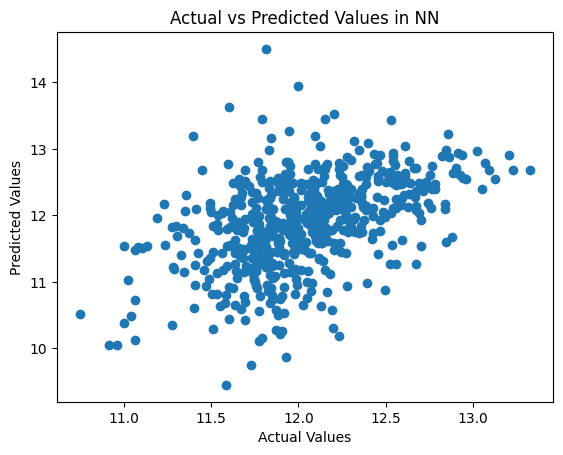

In [ ]:
plt.scatter(y_test, predictions_best_NN)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in NN')
plt.show()

We have a bad score because of the structure of our neural network. Since we do not have enough computational power, we are limited in the grid search dimension.

# Best model results

The goal of this part is to comment the results of the best model we have found.

We retain the **model for his lowest MSE**.

Let's visualize the difference between predicted and reality.

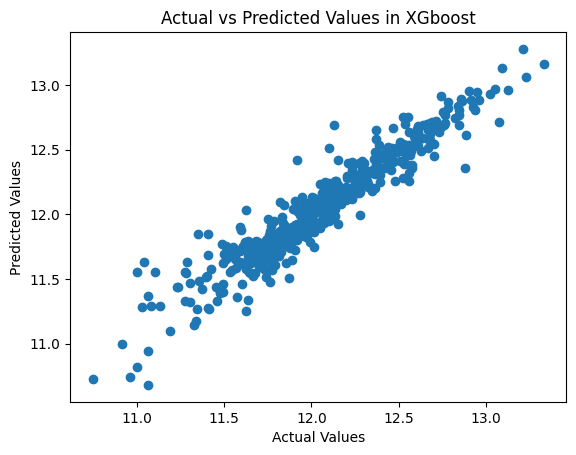

In [ ]:
plt.scatter(y_test, predictions_best_xgb)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in XGboost')
plt.show()

Our model is very good, we have a R-squared of 90% which means that we explain 90% of the variation in our model. Also the model has a MSE of 0.01 which is also very good.

On real SalePrice value :

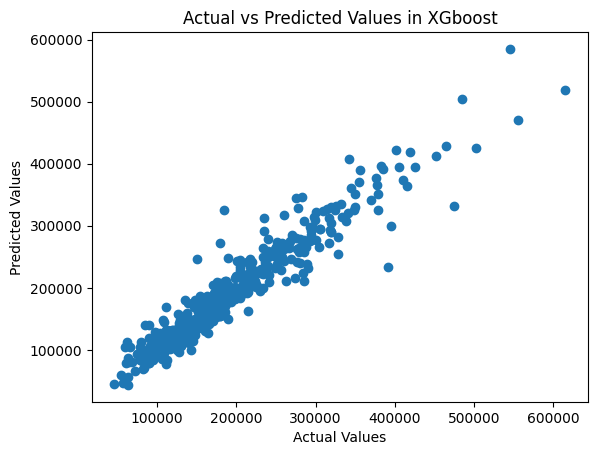

In [ ]:
plt.scatter(np.exp(y_test), np.exp(predictions_best_xgb))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in XGboost')
plt.show()

In [ ]:
mse = mean_squared_error(np.exp(y_test), np.exp(predictions_best_xgb))
rmse = np.sqrt(mse)
r2 = r2_score(np.exp(y_test), np.exp(predictions_best_xgb))

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 23777.690562210435
R-squared: 0.9138467358757737


We are doing better than the winner of the kaggle competition (RMSE=29660), but it is probably due to the fact that we trained on more data than him.